Student Name: Chelliah Kanthanathan
Student ID: 18263003

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn import model_selection
from sklearn.utils import shuffle
import random

# Task 1 - Load the data set

In [3]:
df = pd.read_csv('./bank_et1.csv')

# Print the first five rows
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [4]:
# Print the last five rows
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


# Task 1 - Identify an attribute that can be the target/dependable variable for 2-class classification.

In [5]:
# column loan could be the target/dependable variable. I assume the column show if the account has an existing loan or not.
# The loan column represents yes (loan exists) or no (no loan) that can be used for 2 class classification

# Task 2 - Calculate statistics for the numerical and categorical attributes.

In [6]:
# Print statistical summary for all numerical attributes
df.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [7]:
# check if there is any missing values for categorical attributes
df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [8]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

In [9]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [10]:
df['default'].value_counts()

no     1985
yes      15
Name: default, dtype: int64

In [11]:
df['housing'].value_counts()

no     1037
yes     963
Name: housing, dtype: int64

In [12]:
df['loan'].value_counts()

no     1750
yes     250
Name: loan, dtype: int64

In [13]:
df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

In [14]:
df['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [15]:
df['subscribed'].value_counts()

yes    1000
no     1000
Name: subscribed, dtype: int64

# Task 2 - Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).

Two numerical attributes selected - age and balance

Text(0,0.5,'frequency')

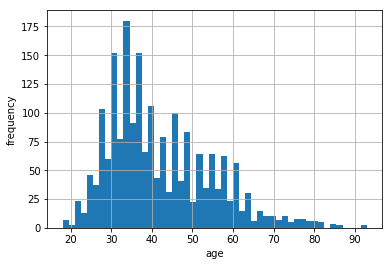

In [16]:
# Plotting a histogram of age to check the distribution of age for 2000 bank accounts
df['age'].hist(bins=50)
plt.xlabel('age')
plt.ylabel('frequency')

age between 30 to 40 has high frequency. Above age 60 and below age 22 have less frequency. This concludes the majority of accounts have age range between 30 to 40 followed by 40 to 60

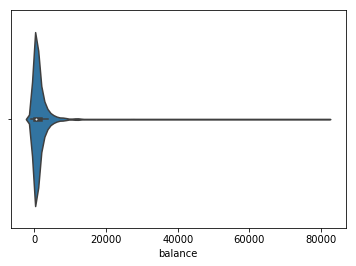

In [17]:
# Plotting Violinplot for balance to check the distribution of balance for 2000 bank accounts
sns.violinplot(x=df['balance'])

above violin plot concludes that most of the accounts have balance above 1000

Two categorical attributes selected - loan and education

Text(0,0.5,'Number of Accounts with loan')

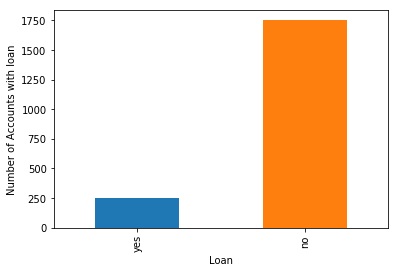

In [18]:
# Plotting bar chart for loan. Plot the accounts with or without loan
frequency_table = df['loan'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('Loan')
plt.ylabel('Number of Accounts with loan')

above bar chart concludes the accounts with loan is 250 and without loan is 1750

Text(0,0.5,'Number of Accounts')

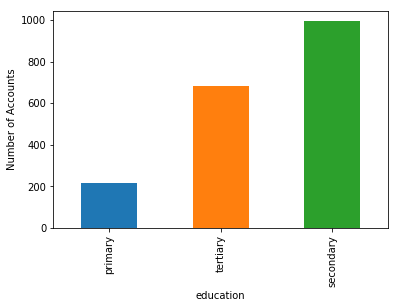

In [19]:
# Plotting bar chart for education.
frequency_table = df['education'].value_counts(ascending=True)
frequency_table.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Number of Accounts')

above bar chart concludes most of the accounts have secondary education followed by tertiary education. But only 200 accounts have primary education

# Task 2 - Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).

Text(0,0.5,'Number of Accounts')

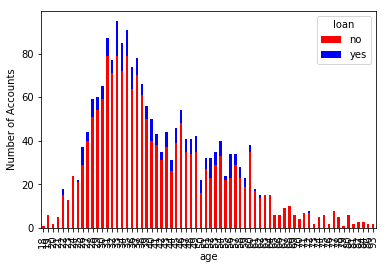

In [20]:
# stacked bar chart for age and loan grouped together to understand the age range that has an existing loan
stacked_chart = pd.crosstab(df['age'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Accounts')

above stacked bar chart concludes that mostly the age range between 30 to 60 has an existing loan

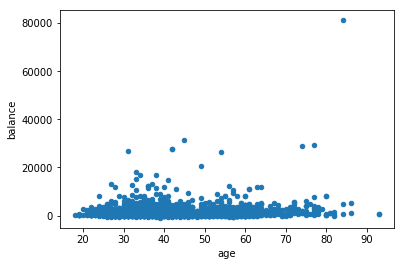

In [21]:
# Examine the relationship between age and balance with a scatter plot.
df.plot.scatter(x='age', y='balance')

above scatter plot concludes that some age range between 80 to 85 has highest balance. At the same time few accounts with in the age range between 30 to 80 has balance between 25000 to 30000. Also another key thing is that any other age group less than 30 or greater than 80 have balance less than 20000.

# Task 2 - Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.

we could use the numerical attributes columns age and balance to understand the likelihood of existing loan i.e with less balance the account would likely to have an existing loan. Also the columns age and balance could have some dependency i.e. with young age the balance could be less and old age the balance could be more as less age obviously would have had the accounts in service for only for few years than old age. So age and balance could have some dependency.

In [22]:
# Column loan is a categorical attribute with two categories:

# Yes - the account has an existing loan
# No - the account with out an existing loan
# Let's look at the chances of existing a loan based on age and balance. So we will examine the relation between atributes age, balance and loan.

In [23]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for loan') 
print(frequency_table)

Frequency Table for loan
yes     250
no     1750
Name: loan, dtype: int64


Text(0,0.5,'Number of Accounts')

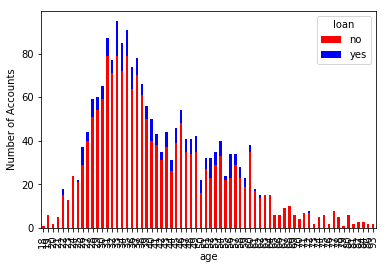

In [24]:
# stacked bar chart for age and loan grouped together to understand the age range that has an existing loan
stacked_chart = pd.crosstab(df['age'], df['loan'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Accounts')

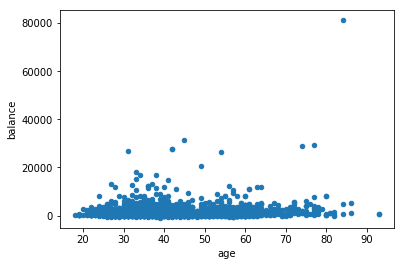

In [25]:
# Examine the relationship between age and balance with a scatter plot.
df.plot.scatter(x='age', y='balance')

above stacked bar chart concludes that mostly the age range between 30 to 60 has an existing loan

above scatter plot concludes that some age range between 80 to 85 has highest balance. At the same time few accounts with in the age range between 30 to 80 has balance between 25000 to 30000. Also another key thing is that any other age group less than 30 or greater than 80 have balance less than 20000.

# Thus we could conclude that the account with age range between 30 and 60 and with balance between 25000 to 30000 has likely chance to apply for loan.

Suggestion: try PLA on this dataset before using the bank dataset

# Task 3

Perceptron model in simple takes 1 or more inputs and aggregates it with weight and return 0 if the sum is above threshold or else returns 1 if the sum is less than threshold. 

The PLA in simple includes below main steps,
1. Initialize weight small random numbers and then Compute linear combination of inputs to get the predicted output
2.Update the weights
3.Note down the errors i.e. difference between actual and expected predicted outputs
4.If the error is not 0 after training then repeat above steps from Step 2 until the error converge to 0

Once we find that there is a pattern that exists between input data (INPUT SPACE) and outputs (OUTPUT SPACE) from EDA then the learning could starts as below,
1.Identify an unknown functions which ideally maps the input space to the output space. In another term this function helps to predict the target variable, So this is called Unknown Target Function
2.Identify set of unknown Target Functions which is called Hypothesis Set
3.Implement the learning algorithm that pick the optimal function from the hypothesis set based on the Data Set
4.After few iterations of updating weight and training example multiple times then the final optimal function is found with which the error converge to zero. This final optimal function is called Final Hypothesis

During training the same data that used to predict the output is used again on the final hypothesis for prediction then the error rate that we get during testing is called in sample error. At the same time if the different data than the one used for training is used on the final hypothesis for prediction then the error rate that we get during testing is called out of sample error.

# Task 4 Run the provided perceptron learning algorithm (PLA) 

In [26]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y = [yy if yy == 1 else -1 for yy in y] 

In [27]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [28]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [29]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    return [point_on_boundary(weights,x_min), point_on_boundary(weights,x_max)]

In [30]:
def pla(training_in, training_out, weights):
    bias = np.array([1])
    iterations=0
    while iterations<10:
        print("No of Iterations:",iterations)
        errors = 0
        iterations+=1
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                weights = weights + y*(np.concatenate((bias,x)))
                print("Weights: ",weights, "& Errors:", errors)
                errors+=1;
        if (errors == 0):
            print("Final Hypothesis Found after ",iterations, " iterations")
            break
    return weights, iterations

In [31]:
def pla_with_pocket_algorithm(training_in, training_out, weights, max_iterations):
    bias = np.array([1])
    iterations=0
    good_err = calc_error(training_in, training_out, weights)
    good_weights = weights
    good_weights_iterations = iterations
    while iterations < max_iterations:
        print("No of Iterations:",iterations)
        errors = 0
        iterations+=1
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                err = calc_error(training_in, training_out, weights)
                if (err < good_err):
                    good_err = err
                    good_weights = weights
                    good_weights_iterations = iterations    
                weights = weights + y*(np.concatenate((bias,x)))
                print("Weights: ",weights, "& Errors:", errors)
                errors+=1;
                
        if (errors == 0):
            print("Final Hypothesis Found after ",iterations, " iterations")
            break
            
    print("Good Weights: ",good_weights, " Found at iteration:", good_weights_iterations)
    return good_err

In [32]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

# PLA on make_blobs dataset

In [33]:
list_of_weights = [0.2,0.6,1]
array_of_weights = np.array(list_of_weights)
pla(X,y,array_of_weights)

No of Iterations: 0
Weights:  [ 1.2         4.73639187 -7.03953516] & Errors: 0
No of Iterations: 1
Final Hypothesis Found after  2  iterations


(array([ 1.2       ,  4.73639187, -7.03953516]), 2)

# PLA with pocket algorithm on make_blob data set

In [34]:
list_of_weights = [0.2,0.6,1]
array_of_weights = np.array(list_of_weights)
pla_with_pocket_algorithm(X,y,array_of_weights,10)

No of Iterations: 0
Weights:  [ 1.2         4.73639187 -7.03953516] & Errors: 0
No of Iterations: 1
Final Hypothesis Found after  2  iterations
Good Weights:  [0.2 0.6 1. ]  Found at iteration: 0


0.999

# PLA on Bank dataset

In [35]:
XX = df[['age', 'balance']].values
print(XX)

[[  32  392]
 [  39  688]
 [  59 1035]
 ...
 [  81 1154]
 [  46 4343]
 [  40 6403]]


In [36]:
yyy = df['loan'].map({'yes': 1, 'no': 0})
print(yyy)

0       0
1       1
2       1
3       1
4       0
5       0
6       1
7       1
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      1
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    1
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
Name: loan, Length: 2000, dtype: int64


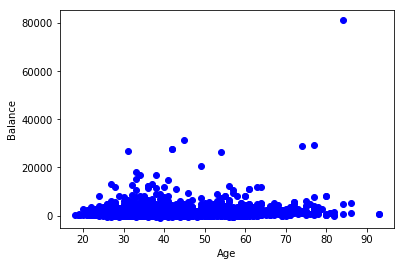

In [37]:
plt.scatter(XX[:,0],XX[:,1],color="blue", marker="o")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

In [38]:
list_of_weights = [1,1,1]
array_of_weights = np.array(list_of_weights)
pla(XX,yyy,array_of_weights)

No of Iterations: 0
Weights:  [1 1 1] & Errors: 0
Weights:  [1 1 1] & Errors: 1
Weights:  [1 1 1] & Errors: 2
Weights:  [1 1 1] & Errors: 3
Weights:  [1 1 1] & Errors: 4
Weights:  [1 1 1] & Errors: 5
Weights:  [1 1 1] & Errors: 6
Weights:  [1 1 1] & Errors: 7
Weights:  [1 1 1] & Errors: 8
Weights:  [1 1 1] & Errors: 9
Weights:  [1 1 1] & Errors: 10
Weights:  [1 1 1] & Errors: 11
Weights:  [1 1 1] & Errors: 12
Weights:  [1 1 1] & Errors: 13
Weights:  [1 1 1] & Errors: 14
Weights:  [1 1 1] & Errors: 15
Weights:  [1 1 1] & Errors: 16
Weights:  [1 1 1] & Errors: 17
Weights:  [1 1 1] & Errors: 18
Weights:  [1 1 1] & Errors: 19
Weights:  [1 1 1] & Errors: 20
Weights:  [1 1 1] & Errors: 21
Weights:  [1 1 1] & Errors: 22
Weights:  [1 1 1] & Errors: 23
Weights:  [1 1 1] & Errors: 24
Weights:  [1 1 1] & Errors: 25
Weights:  [1 1 1] & Errors: 26
Weights:  [1 1 1] & Errors: 27
Weights:  [1 1 1] & Errors: 28
Weights:  [1 1 1] & Errors: 29
Weights:  [1 1 1] & Errors: 30
Weights:  [1 1 1] & Errors: 3

Weights:  [  10  388 1443] & Errors: 292
Weights:  [  10  388 1443] & Errors: 293
Weights:  [  10  388 1443] & Errors: 294
Weights:  [  10  388 1443] & Errors: 295
Weights:  [  10  388 1443] & Errors: 296
Weights:  [  10  388 1443] & Errors: 297
Weights:  [  10  388 1443] & Errors: 298
Weights:  [  10  388 1443] & Errors: 299
Weights:  [  10  388 1443] & Errors: 300
Weights:  [  10  388 1443] & Errors: 301
Weights:  [  10  388 1443] & Errors: 302
Weights:  [  10  388 1443] & Errors: 303
Weights:  [  10  388 1443] & Errors: 304
Weights:  [  10  388 1443] & Errors: 305
Weights:  [  10  388 1443] & Errors: 306
Weights:  [  10  388 1443] & Errors: 307
Weights:  [  10  388 1443] & Errors: 308
Weights:  [  10  388 1443] & Errors: 309
Weights:  [  10  388 1443] & Errors: 310
Weights:  [  10  388 1443] & Errors: 311
Weights:  [  10  388 1443] & Errors: 312
Weights:  [  10  388 1443] & Errors: 313
Weights:  [  10  388 1443] & Errors: 314
Weights:  [  10  388 1443] & Errors: 315
Weights:  [  10 

Weights:  [ 21 840 481] & Errors: 542
Weights:  [ 21 840 481] & Errors: 543
Weights:  [  22  897 -195] & Errors: 544
Weights:  [  22  897 -195] & Errors: 545
Weights:  [  22  897 -195] & Errors: 546
Weights:  [  22  897 -195] & Errors: 547
Weights:  [  22  897 -195] & Errors: 548
Weights:  [  22  897 -195] & Errors: 549
Weights:  [ 23 941 293] & Errors: 550
Weights:  [ 23 941 293] & Errors: 551
Weights:  [ 23 941 293] & Errors: 552
Weights:  [ 23 941 293] & Errors: 553
Weights:  [ 23 941 293] & Errors: 554
Weights:  [ 23 941 293] & Errors: 555
Weights:  [ 23 941 293] & Errors: 556
Weights:  [ 23 941 293] & Errors: 557
Weights:  [ 23 941 293] & Errors: 558
Weights:  [ 23 941 293] & Errors: 559
Weights:  [ 23 941 293] & Errors: 560
Weights:  [ 23 941 293] & Errors: 561
Weights:  [ 23 941 293] & Errors: 562
Weights:  [ 23 941 293] & Errors: 563
Weights:  [ 23 941 293] & Errors: 564
Weights:  [ 23 941 293] & Errors: 565
Weights:  [ 23 941 293] & Errors: 566
Weights:  [ 23 941 293] & Errors

Weights:  [  27 1077  421] & Errors: 792
Weights:  [  27 1077  421] & Errors: 793
Weights:  [  27 1077  421] & Errors: 794
Weights:  [  27 1077  421] & Errors: 795
Weights:  [  27 1077  421] & Errors: 796
Weights:  [  27 1077  421] & Errors: 797
Weights:  [  27 1077  421] & Errors: 798
Weights:  [  27 1077  421] & Errors: 799
Weights:  [  27 1077  421] & Errors: 800
Weights:  [  27 1077  421] & Errors: 801
Weights:  [  27 1077  421] & Errors: 802
Weights:  [  27 1077  421] & Errors: 803
Weights:  [  27 1077  421] & Errors: 804
Weights:  [  27 1077  421] & Errors: 805
Weights:  [  27 1077  421] & Errors: 806
Weights:  [  27 1077  421] & Errors: 807
Weights:  [  27 1077  421] & Errors: 808
Weights:  [  27 1077  421] & Errors: 809
Weights:  [  27 1077  421] & Errors: 810
Weights:  [  27 1077  421] & Errors: 811
Weights:  [  27 1077  421] & Errors: 812
Weights:  [  27 1077  421] & Errors: 813
Weights:  [  27 1077  421] & Errors: 814
Weights:  [  27 1077  421] & Errors: 815
Weights:  [  27 

Weights:  [  27 1077  421] & Errors: 1060
Weights:  [  27 1077  421] & Errors: 1061
Weights:  [  27 1077  421] & Errors: 1062
Weights:  [  27 1077  421] & Errors: 1063
Weights:  [  27 1077  421] & Errors: 1064
Weights:  [  27 1077  421] & Errors: 1065
Weights:  [  27 1077  421] & Errors: 1066
Weights:  [  27 1077  421] & Errors: 1067
Weights:  [  27 1077  421] & Errors: 1068
Weights:  [  27 1077  421] & Errors: 1069
Weights:  [  27 1077  421] & Errors: 1070
Weights:  [  27 1077  421] & Errors: 1071
Weights:  [  27 1077  421] & Errors: 1072
Weights:  [  27 1077  421] & Errors: 1073
Weights:  [  27 1077  421] & Errors: 1074
Weights:  [  27 1077  421] & Errors: 1075
Weights:  [  27 1077  421] & Errors: 1076
Weights:  [  27 1077  421] & Errors: 1077
Weights:  [  27 1077  421] & Errors: 1078
Weights:  [  27 1077  421] & Errors: 1079
Weights:  [  27 1077  421] & Errors: 1080
Weights:  [  27 1077  421] & Errors: 1081
Weights:  [  27 1077  421] & Errors: 1082
Weights:  [  27 1077  421] & Error

Weights:  [  27 1077  421] & Errors: 1327
Weights:  [  27 1077  421] & Errors: 1328
Weights:  [  27 1077  421] & Errors: 1329
Weights:  [  27 1077  421] & Errors: 1330
Weights:  [  27 1077  421] & Errors: 1331
Weights:  [  27 1077  421] & Errors: 1332
Weights:  [  27 1077  421] & Errors: 1333
Weights:  [  27 1077  421] & Errors: 1334
Weights:  [  27 1077  421] & Errors: 1335
Weights:  [  27 1077  421] & Errors: 1336
Weights:  [  27 1077  421] & Errors: 1337
Weights:  [  27 1077  421] & Errors: 1338
Weights:  [  27 1077  421] & Errors: 1339
Weights:  [  27 1077  421] & Errors: 1340
Weights:  [  27 1077  421] & Errors: 1341
Weights:  [  27 1077  421] & Errors: 1342
Weights:  [  27 1077  421] & Errors: 1343
Weights:  [  27 1077  421] & Errors: 1344
Weights:  [  27 1077  421] & Errors: 1345
Weights:  [  27 1077  421] & Errors: 1346
Weights:  [  27 1077  421] & Errors: 1347
Weights:  [  27 1077  421] & Errors: 1348
Weights:  [  27 1077  421] & Errors: 1349
Weights:  [  27 1077  421] & Error

Weights:  [  27 1077  421] & Errors: 1630
Weights:  [  27 1077  421] & Errors: 1631
Weights:  [  27 1077  421] & Errors: 1632
Weights:  [  27 1077  421] & Errors: 1633
Weights:  [  27 1077  421] & Errors: 1634
Weights:  [  27 1077  421] & Errors: 1635
Weights:  [  27 1077  421] & Errors: 1636
Weights:  [  27 1077  421] & Errors: 1637
Weights:  [  27 1077  421] & Errors: 1638
Weights:  [  27 1077  421] & Errors: 1639
Weights:  [  27 1077  421] & Errors: 1640
Weights:  [  27 1077  421] & Errors: 1641
Weights:  [  27 1077  421] & Errors: 1642
Weights:  [  27 1077  421] & Errors: 1643
Weights:  [  27 1077  421] & Errors: 1644
Weights:  [  27 1077  421] & Errors: 1645
Weights:  [  27 1077  421] & Errors: 1646
Weights:  [  27 1077  421] & Errors: 1647
Weights:  [  27 1077  421] & Errors: 1648
Weights:  [  27 1077  421] & Errors: 1649
Weights:  [  27 1077  421] & Errors: 1650
Weights:  [  27 1077  421] & Errors: 1651
Weights:  [  27 1077  421] & Errors: 1652
Weights:  [  27 1077  421] & Error

Weights:  [  28 1111  150] & Errors: 140
Weights:  [  28 1111  150] & Errors: 141
Weights:  [  28 1111  150] & Errors: 142
Weights:  [  28 1111  150] & Errors: 143
Weights:  [  28 1111  150] & Errors: 144
Weights:  [  28 1111  150] & Errors: 145
Weights:  [  28 1111  150] & Errors: 146
Weights:  [  28 1111  150] & Errors: 147
Weights:  [  28 1111  150] & Errors: 148
Weights:  [  28 1111  150] & Errors: 149
Weights:  [  28 1111  150] & Errors: 150
Weights:  [  28 1111  150] & Errors: 151
Weights:  [  28 1111  150] & Errors: 152
Weights:  [  28 1111  150] & Errors: 153
Weights:  [  28 1111  150] & Errors: 154
Weights:  [  28 1111  150] & Errors: 155
Weights:  [  28 1111  150] & Errors: 156
Weights:  [  28 1111  150] & Errors: 157
Weights:  [  28 1111  150] & Errors: 158
Weights:  [  28 1111  150] & Errors: 159
Weights:  [  28 1111  150] & Errors: 160
Weights:  [  28 1111  150] & Errors: 161
Weights:  [  28 1111  150] & Errors: 162
Weights:  [  28 1111  150] & Errors: 163
Weights:  [  28 

Weights:  [  40 1605 1066] & Errors: 487
Weights:  [  40 1605 1066] & Errors: 488
Weights:  [  40 1605 1066] & Errors: 489
Weights:  [  40 1605 1066] & Errors: 490
Weights:  [  40 1605 1066] & Errors: 491
Weights:  [  41 1641  509] & Errors: 492
Weights:  [  41 1641  509] & Errors: 493
Weights:  [  41 1641  509] & Errors: 494
Weights:  [  41 1641  509] & Errors: 495
Weights:  [  41 1641  509] & Errors: 496
Weights:  [  41 1641  509] & Errors: 497
Weights:  [  41 1641  509] & Errors: 498
Weights:  [  41 1641  509] & Errors: 499
Weights:  [  41 1641  509] & Errors: 500
Weights:  [  41 1641  509] & Errors: 501
Weights:  [  41 1641  509] & Errors: 502
Weights:  [  41 1641  509] & Errors: 503
Weights:  [  41 1641  509] & Errors: 504
Weights:  [  41 1641  509] & Errors: 505
Weights:  [  41 1641  509] & Errors: 506
Weights:  [  41 1641  509] & Errors: 507
Weights:  [  41 1641  509] & Errors: 508
Weights:  [  41 1641  509] & Errors: 509
Weights:  [  41 1641  509] & Errors: 510
Weights:  [  41 

Weights:  [  42 1667  107] & Errors: 765
Weights:  [  42 1667  107] & Errors: 766
Weights:  [  42 1667  107] & Errors: 767
Weights:  [  42 1667  107] & Errors: 768
Weights:  [  42 1667  107] & Errors: 769
Weights:  [  42 1667  107] & Errors: 770
Weights:  [  42 1667  107] & Errors: 771
Weights:  [  42 1667  107] & Errors: 772
Weights:  [  42 1667  107] & Errors: 773
Weights:  [  42 1667  107] & Errors: 774
Weights:  [  42 1667  107] & Errors: 775
Weights:  [  42 1667  107] & Errors: 776
Weights:  [  42 1667  107] & Errors: 777
Weights:  [  42 1667  107] & Errors: 778
Weights:  [  42 1667  107] & Errors: 779
Weights:  [  42 1667  107] & Errors: 780
Weights:  [  42 1667  107] & Errors: 781
Weights:  [  42 1667  107] & Errors: 782
Weights:  [  42 1667  107] & Errors: 783
Weights:  [  42 1667  107] & Errors: 784
Weights:  [  42 1667  107] & Errors: 785
Weights:  [  42 1667  107] & Errors: 786
Weights:  [  42 1667  107] & Errors: 787
Weights:  [  42 1667  107] & Errors: 788
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1140
Weights:  [  42 1667  107] & Errors: 1141
Weights:  [  42 1667  107] & Errors: 1142
Weights:  [  42 1667  107] & Errors: 1143
Weights:  [  42 1667  107] & Errors: 1144
Weights:  [  42 1667  107] & Errors: 1145
Weights:  [  42 1667  107] & Errors: 1146
Weights:  [  42 1667  107] & Errors: 1147
Weights:  [  42 1667  107] & Errors: 1148
Weights:  [  42 1667  107] & Errors: 1149
Weights:  [  42 1667  107] & Errors: 1150
Weights:  [  42 1667  107] & Errors: 1151
Weights:  [  42 1667  107] & Errors: 1152
Weights:  [  42 1667  107] & Errors: 1153
Weights:  [  42 1667  107] & Errors: 1154
Weights:  [  42 1667  107] & Errors: 1155
Weights:  [  42 1667  107] & Errors: 1156
Weights:  [  42 1667  107] & Errors: 1157
Weights:  [  42 1667  107] & Errors: 1158
Weights:  [  42 1667  107] & Errors: 1159
Weights:  [  42 1667  107] & Errors: 1160
Weights:  [  42 1667  107] & Errors: 1161
Weights:  [  42 1667  107] & Errors: 1162
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1514
Weights:  [  42 1667  107] & Errors: 1515
Weights:  [  42 1667  107] & Errors: 1516
Weights:  [  42 1667  107] & Errors: 1517
Weights:  [  42 1667  107] & Errors: 1518
Weights:  [  42 1667  107] & Errors: 1519
Weights:  [  42 1667  107] & Errors: 1520
Weights:  [  42 1667  107] & Errors: 1521
Weights:  [  42 1667  107] & Errors: 1522
Weights:  [  42 1667  107] & Errors: 1523
Weights:  [  42 1667  107] & Errors: 1524
Weights:  [  42 1667  107] & Errors: 1525
Weights:  [  42 1667  107] & Errors: 1526
Weights:  [  42 1667  107] & Errors: 1527
Weights:  [  42 1667  107] & Errors: 1528
Weights:  [  42 1667  107] & Errors: 1529
Weights:  [  42 1667  107] & Errors: 1530
Weights:  [  42 1667  107] & Errors: 1531
Weights:  [  42 1667  107] & Errors: 1532
Weights:  [  42 1667  107] & Errors: 1533
Weights:  [  42 1667  107] & Errors: 1534
Weights:  [  42 1667  107] & Errors: 1535
Weights:  [  42 1667  107] & Errors: 1536
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1764
No of Iterations: 2
Weights:  [  42 1667  107] & Errors: 0
Weights:  [  42 1667  107] & Errors: 1
Weights:  [  42 1667  107] & Errors: 2
Weights:  [  42 1667  107] & Errors: 3
Weights:  [  42 1667  107] & Errors: 4
Weights:  [  42 1667  107] & Errors: 5
Weights:  [  42 1667  107] & Errors: 6
Weights:  [  42 1667  107] & Errors: 7
Weights:  [  42 1667  107] & Errors: 8
Weights:  [  42 1667  107] & Errors: 9
Weights:  [  42 1667  107] & Errors: 10
Weights:  [  42 1667  107] & Errors: 11
Weights:  [  42 1667  107] & Errors: 12
Weights:  [  42 1667  107] & Errors: 13
Weights:  [  42 1667  107] & Errors: 14
Weights:  [  42 1667  107] & Errors: 15
Weights:  [  42 1667  107] & Errors: 16
Weights:  [  42 1667  107] & Errors: 17
Weights:  [  42 1667  107] & Errors: 18
Weights:  [  42 1667  107] & Errors: 19
Weights:  [  42 1667  107] & Errors: 20
Weights:  [  42 1667  107] & Errors: 21
Weights:  [  42 1667  107] & Errors: 22
Weights:  [  42 1667  107] &

Weights:  [  42 1667  107] & Errors: 362
Weights:  [  42 1667  107] & Errors: 363
Weights:  [  42 1667  107] & Errors: 364
Weights:  [  42 1667  107] & Errors: 365
Weights:  [  42 1667  107] & Errors: 366
Weights:  [  42 1667  107] & Errors: 367
Weights:  [  42 1667  107] & Errors: 368
Weights:  [  42 1667  107] & Errors: 369
Weights:  [  42 1667  107] & Errors: 370
Weights:  [  42 1667  107] & Errors: 371
Weights:  [  42 1667  107] & Errors: 372
Weights:  [  42 1667  107] & Errors: 373
Weights:  [  42 1667  107] & Errors: 374
Weights:  [  42 1667  107] & Errors: 375
Weights:  [  42 1667  107] & Errors: 376
Weights:  [  42 1667  107] & Errors: 377
Weights:  [  42 1667  107] & Errors: 378
Weights:  [  42 1667  107] & Errors: 379
Weights:  [  42 1667  107] & Errors: 380
Weights:  [  42 1667  107] & Errors: 381
Weights:  [  42 1667  107] & Errors: 382
Weights:  [  42 1667  107] & Errors: 383
Weights:  [  42 1667  107] & Errors: 384
Weights:  [  42 1667  107] & Errors: 385
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 624
Weights:  [  42 1667  107] & Errors: 625
Weights:  [  42 1667  107] & Errors: 626
Weights:  [  42 1667  107] & Errors: 627
Weights:  [  42 1667  107] & Errors: 628
Weights:  [  42 1667  107] & Errors: 629
Weights:  [  42 1667  107] & Errors: 630
Weights:  [  42 1667  107] & Errors: 631
Weights:  [  42 1667  107] & Errors: 632
Weights:  [  42 1667  107] & Errors: 633
Weights:  [  42 1667  107] & Errors: 634
Weights:  [  42 1667  107] & Errors: 635
Weights:  [  42 1667  107] & Errors: 636
Weights:  [  42 1667  107] & Errors: 637
Weights:  [  42 1667  107] & Errors: 638
Weights:  [  42 1667  107] & Errors: 639
Weights:  [  42 1667  107] & Errors: 640
Weights:  [  42 1667  107] & Errors: 641
Weights:  [  42 1667  107] & Errors: 642
Weights:  [  42 1667  107] & Errors: 643
Weights:  [  42 1667  107] & Errors: 644
Weights:  [  42 1667  107] & Errors: 645
Weights:  [  42 1667  107] & Errors: 646
Weights:  [  42 1667  107] & Errors: 647
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 998
Weights:  [  42 1667  107] & Errors: 999
Weights:  [  42 1667  107] & Errors: 1000
Weights:  [  42 1667  107] & Errors: 1001
Weights:  [  42 1667  107] & Errors: 1002
Weights:  [  42 1667  107] & Errors: 1003
Weights:  [  42 1667  107] & Errors: 1004
Weights:  [  42 1667  107] & Errors: 1005
Weights:  [  42 1667  107] & Errors: 1006
Weights:  [  42 1667  107] & Errors: 1007
Weights:  [  42 1667  107] & Errors: 1008
Weights:  [  42 1667  107] & Errors: 1009
Weights:  [  42 1667  107] & Errors: 1010
Weights:  [  42 1667  107] & Errors: 1011
Weights:  [  42 1667  107] & Errors: 1012
Weights:  [  42 1667  107] & Errors: 1013
Weights:  [  42 1667  107] & Errors: 1014
Weights:  [  42 1667  107] & Errors: 1015
Weights:  [  42 1667  107] & Errors: 1016
Weights:  [  42 1667  107] & Errors: 1017
Weights:  [  42 1667  107] & Errors: 1018
Weights:  [  42 1667  107] & Errors: 1019
Weights:  [  42 1667  107] & Errors: 1020
Weights:  [  42 1667  107] & Errors:

Weights:  [  42 1667  107] & Errors: 1373
Weights:  [  42 1667  107] & Errors: 1374
Weights:  [  42 1667  107] & Errors: 1375
Weights:  [  42 1667  107] & Errors: 1376
Weights:  [  42 1667  107] & Errors: 1377
Weights:  [  42 1667  107] & Errors: 1378
Weights:  [  42 1667  107] & Errors: 1379
Weights:  [  42 1667  107] & Errors: 1380
Weights:  [  42 1667  107] & Errors: 1381
Weights:  [  42 1667  107] & Errors: 1382
Weights:  [  42 1667  107] & Errors: 1383
Weights:  [  42 1667  107] & Errors: 1384
Weights:  [  42 1667  107] & Errors: 1385
Weights:  [  42 1667  107] & Errors: 1386
Weights:  [  42 1667  107] & Errors: 1387
Weights:  [  42 1667  107] & Errors: 1388
Weights:  [  42 1667  107] & Errors: 1389
Weights:  [  42 1667  107] & Errors: 1390
Weights:  [  42 1667  107] & Errors: 1391
Weights:  [  42 1667  107] & Errors: 1392
Weights:  [  42 1667  107] & Errors: 1393
Weights:  [  42 1667  107] & Errors: 1394
Weights:  [  42 1667  107] & Errors: 1395
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1748
Weights:  [  42 1667  107] & Errors: 1749
No of Iterations: 3
Weights:  [  42 1667  107] & Errors: 0
Weights:  [  42 1667  107] & Errors: 1
Weights:  [  42 1667  107] & Errors: 2
Weights:  [  42 1667  107] & Errors: 3
Weights:  [  42 1667  107] & Errors: 4
Weights:  [  42 1667  107] & Errors: 5
Weights:  [  42 1667  107] & Errors: 6
Weights:  [  42 1667  107] & Errors: 7
Weights:  [  42 1667  107] & Errors: 8
Weights:  [  42 1667  107] & Errors: 9
Weights:  [  42 1667  107] & Errors: 10
Weights:  [  42 1667  107] & Errors: 11
Weights:  [  42 1667  107] & Errors: 12
Weights:  [  42 1667  107] & Errors: 13
Weights:  [  42 1667  107] & Errors: 14
Weights:  [  42 1667  107] & Errors: 15
Weights:  [  42 1667  107] & Errors: 16
Weights:  [  42 1667  107] & Errors: 17
Weights:  [  42 1667  107] & Errors: 18
Weights:  [  42 1667  107] & Errors: 19
Weights:  [  42 1667  107] & Errors: 20
Weights:  [  42 1667  107] & Errors: 21
Weights:  [  42 1667  107]

Weights:  [  42 1667  107] & Errors: 373
Weights:  [  42 1667  107] & Errors: 374
Weights:  [  42 1667  107] & Errors: 375
Weights:  [  42 1667  107] & Errors: 376
Weights:  [  42 1667  107] & Errors: 377
Weights:  [  42 1667  107] & Errors: 378
Weights:  [  42 1667  107] & Errors: 379
Weights:  [  42 1667  107] & Errors: 380
Weights:  [  42 1667  107] & Errors: 381
Weights:  [  42 1667  107] & Errors: 382
Weights:  [  42 1667  107] & Errors: 383
Weights:  [  42 1667  107] & Errors: 384
Weights:  [  42 1667  107] & Errors: 385
Weights:  [  42 1667  107] & Errors: 386
Weights:  [  42 1667  107] & Errors: 387
Weights:  [  42 1667  107] & Errors: 388
Weights:  [  42 1667  107] & Errors: 389
Weights:  [  42 1667  107] & Errors: 390
Weights:  [  42 1667  107] & Errors: 391
Weights:  [  42 1667  107] & Errors: 392
Weights:  [  42 1667  107] & Errors: 393
Weights:  [  42 1667  107] & Errors: 394
Weights:  [  42 1667  107] & Errors: 395
Weights:  [  42 1667  107] & Errors: 396
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 747
Weights:  [  42 1667  107] & Errors: 748
Weights:  [  42 1667  107] & Errors: 749
Weights:  [  42 1667  107] & Errors: 750
Weights:  [  42 1667  107] & Errors: 751
Weights:  [  42 1667  107] & Errors: 752
Weights:  [  42 1667  107] & Errors: 753
Weights:  [  42 1667  107] & Errors: 754
Weights:  [  42 1667  107] & Errors: 755
Weights:  [  42 1667  107] & Errors: 756
Weights:  [  42 1667  107] & Errors: 757
Weights:  [  42 1667  107] & Errors: 758
Weights:  [  42 1667  107] & Errors: 759
Weights:  [  42 1667  107] & Errors: 760
Weights:  [  42 1667  107] & Errors: 761
Weights:  [  42 1667  107] & Errors: 762
Weights:  [  42 1667  107] & Errors: 763
Weights:  [  42 1667  107] & Errors: 764
Weights:  [  42 1667  107] & Errors: 765
Weights:  [  42 1667  107] & Errors: 766
Weights:  [  42 1667  107] & Errors: 767
Weights:  [  42 1667  107] & Errors: 768
Weights:  [  42 1667  107] & Errors: 769
Weights:  [  42 1667  107] & Errors: 770
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1122
Weights:  [  42 1667  107] & Errors: 1123
Weights:  [  42 1667  107] & Errors: 1124
Weights:  [  42 1667  107] & Errors: 1125
Weights:  [  42 1667  107] & Errors: 1126
Weights:  [  42 1667  107] & Errors: 1127
Weights:  [  42 1667  107] & Errors: 1128
Weights:  [  42 1667  107] & Errors: 1129
Weights:  [  42 1667  107] & Errors: 1130
Weights:  [  42 1667  107] & Errors: 1131
Weights:  [  42 1667  107] & Errors: 1132
Weights:  [  42 1667  107] & Errors: 1133
Weights:  [  42 1667  107] & Errors: 1134
Weights:  [  42 1667  107] & Errors: 1135
Weights:  [  42 1667  107] & Errors: 1136
Weights:  [  42 1667  107] & Errors: 1137
Weights:  [  42 1667  107] & Errors: 1138
Weights:  [  42 1667  107] & Errors: 1139
Weights:  [  42 1667  107] & Errors: 1140
Weights:  [  42 1667  107] & Errors: 1141
Weights:  [  42 1667  107] & Errors: 1142
Weights:  [  42 1667  107] & Errors: 1143
Weights:  [  42 1667  107] & Errors: 1144
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1497
Weights:  [  42 1667  107] & Errors: 1498
Weights:  [  42 1667  107] & Errors: 1499
Weights:  [  42 1667  107] & Errors: 1500
Weights:  [  42 1667  107] & Errors: 1501
Weights:  [  42 1667  107] & Errors: 1502
Weights:  [  42 1667  107] & Errors: 1503
Weights:  [  42 1667  107] & Errors: 1504
Weights:  [  42 1667  107] & Errors: 1505
Weights:  [  42 1667  107] & Errors: 1506
Weights:  [  42 1667  107] & Errors: 1507
Weights:  [  42 1667  107] & Errors: 1508
Weights:  [  42 1667  107] & Errors: 1509
Weights:  [  42 1667  107] & Errors: 1510
Weights:  [  42 1667  107] & Errors: 1511
Weights:  [  42 1667  107] & Errors: 1512
Weights:  [  42 1667  107] & Errors: 1513
Weights:  [  42 1667  107] & Errors: 1514
Weights:  [  42 1667  107] & Errors: 1515
Weights:  [  42 1667  107] & Errors: 1516
Weights:  [  42 1667  107] & Errors: 1517
Weights:  [  42 1667  107] & Errors: 1518
Weights:  [  42 1667  107] & Errors: 1519
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 122
Weights:  [  42 1667  107] & Errors: 123
Weights:  [  42 1667  107] & Errors: 124
Weights:  [  42 1667  107] & Errors: 125
Weights:  [  42 1667  107] & Errors: 126
Weights:  [  42 1667  107] & Errors: 127
Weights:  [  42 1667  107] & Errors: 128
Weights:  [  42 1667  107] & Errors: 129
Weights:  [  42 1667  107] & Errors: 130
Weights:  [  42 1667  107] & Errors: 131
Weights:  [  42 1667  107] & Errors: 132
Weights:  [  42 1667  107] & Errors: 133
Weights:  [  42 1667  107] & Errors: 134
Weights:  [  42 1667  107] & Errors: 135
Weights:  [  42 1667  107] & Errors: 136
Weights:  [  42 1667  107] & Errors: 137
Weights:  [  42 1667  107] & Errors: 138
Weights:  [  42 1667  107] & Errors: 139
Weights:  [  42 1667  107] & Errors: 140
Weights:  [  42 1667  107] & Errors: 141
Weights:  [  42 1667  107] & Errors: 142
Weights:  [  42 1667  107] & Errors: 143
Weights:  [  42 1667  107] & Errors: 144
Weights:  [  42 1667  107] & Errors: 145
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 496
Weights:  [  42 1667  107] & Errors: 497
Weights:  [  42 1667  107] & Errors: 498
Weights:  [  42 1667  107] & Errors: 499
Weights:  [  42 1667  107] & Errors: 500
Weights:  [  42 1667  107] & Errors: 501
Weights:  [  42 1667  107] & Errors: 502
Weights:  [  42 1667  107] & Errors: 503
Weights:  [  42 1667  107] & Errors: 504
Weights:  [  42 1667  107] & Errors: 505
Weights:  [  42 1667  107] & Errors: 506
Weights:  [  42 1667  107] & Errors: 507
Weights:  [  42 1667  107] & Errors: 508
Weights:  [  42 1667  107] & Errors: 509
Weights:  [  42 1667  107] & Errors: 510
Weights:  [  42 1667  107] & Errors: 511
Weights:  [  42 1667  107] & Errors: 512
Weights:  [  42 1667  107] & Errors: 513
Weights:  [  42 1667  107] & Errors: 514
Weights:  [  42 1667  107] & Errors: 515
Weights:  [  42 1667  107] & Errors: 516
Weights:  [  42 1667  107] & Errors: 517
Weights:  [  42 1667  107] & Errors: 518
Weights:  [  42 1667  107] & Errors: 519
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 871
Weights:  [  42 1667  107] & Errors: 872
Weights:  [  42 1667  107] & Errors: 873
Weights:  [  42 1667  107] & Errors: 874
Weights:  [  42 1667  107] & Errors: 875
Weights:  [  42 1667  107] & Errors: 876
Weights:  [  42 1667  107] & Errors: 877
Weights:  [  42 1667  107] & Errors: 878
Weights:  [  42 1667  107] & Errors: 879
Weights:  [  42 1667  107] & Errors: 880
Weights:  [  42 1667  107] & Errors: 881
Weights:  [  42 1667  107] & Errors: 882
Weights:  [  42 1667  107] & Errors: 883
Weights:  [  42 1667  107] & Errors: 884
Weights:  [  42 1667  107] & Errors: 885
Weights:  [  42 1667  107] & Errors: 886
Weights:  [  42 1667  107] & Errors: 887
Weights:  [  42 1667  107] & Errors: 888
Weights:  [  42 1667  107] & Errors: 889
Weights:  [  42 1667  107] & Errors: 890
Weights:  [  42 1667  107] & Errors: 891
Weights:  [  42 1667  107] & Errors: 892
Weights:  [  42 1667  107] & Errors: 893
Weights:  [  42 1667  107] & Errors: 894
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1246
Weights:  [  42 1667  107] & Errors: 1247
Weights:  [  42 1667  107] & Errors: 1248
Weights:  [  42 1667  107] & Errors: 1249
Weights:  [  42 1667  107] & Errors: 1250
Weights:  [  42 1667  107] & Errors: 1251
Weights:  [  42 1667  107] & Errors: 1252
Weights:  [  42 1667  107] & Errors: 1253
Weights:  [  42 1667  107] & Errors: 1254
Weights:  [  42 1667  107] & Errors: 1255
Weights:  [  42 1667  107] & Errors: 1256
Weights:  [  42 1667  107] & Errors: 1257
Weights:  [  42 1667  107] & Errors: 1258
Weights:  [  42 1667  107] & Errors: 1259
Weights:  [  42 1667  107] & Errors: 1260
Weights:  [  42 1667  107] & Errors: 1261
Weights:  [  42 1667  107] & Errors: 1262
Weights:  [  42 1667  107] & Errors: 1263
Weights:  [  42 1667  107] & Errors: 1264
Weights:  [  42 1667  107] & Errors: 1265
Weights:  [  42 1667  107] & Errors: 1266
Weights:  [  42 1667  107] & Errors: 1267
Weights:  [  42 1667  107] & Errors: 1268
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1621
Weights:  [  42 1667  107] & Errors: 1622
Weights:  [  42 1667  107] & Errors: 1623
Weights:  [  42 1667  107] & Errors: 1624
Weights:  [  42 1667  107] & Errors: 1625
Weights:  [  42 1667  107] & Errors: 1626
Weights:  [  42 1667  107] & Errors: 1627
Weights:  [  42 1667  107] & Errors: 1628
Weights:  [  42 1667  107] & Errors: 1629
Weights:  [  42 1667  107] & Errors: 1630
Weights:  [  42 1667  107] & Errors: 1631
Weights:  [  42 1667  107] & Errors: 1632
Weights:  [  42 1667  107] & Errors: 1633
Weights:  [  42 1667  107] & Errors: 1634
Weights:  [  42 1667  107] & Errors: 1635
Weights:  [  42 1667  107] & Errors: 1636
Weights:  [  42 1667  107] & Errors: 1637
Weights:  [  42 1667  107] & Errors: 1638
Weights:  [  42 1667  107] & Errors: 1639
Weights:  [  42 1667  107] & Errors: 1640
Weights:  [  42 1667  107] & Errors: 1641
Weights:  [  42 1667  107] & Errors: 1642
Weights:  [  42 1667  107] & Errors: 1643
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 245
Weights:  [  42 1667  107] & Errors: 246
Weights:  [  42 1667  107] & Errors: 247
Weights:  [  42 1667  107] & Errors: 248
Weights:  [  42 1667  107] & Errors: 249
Weights:  [  42 1667  107] & Errors: 250
Weights:  [  42 1667  107] & Errors: 251
Weights:  [  42 1667  107] & Errors: 252
Weights:  [  42 1667  107] & Errors: 253
Weights:  [  42 1667  107] & Errors: 254
Weights:  [  42 1667  107] & Errors: 255
Weights:  [  42 1667  107] & Errors: 256
Weights:  [  42 1667  107] & Errors: 257
Weights:  [  42 1667  107] & Errors: 258
Weights:  [  42 1667  107] & Errors: 259
Weights:  [  42 1667  107] & Errors: 260
Weights:  [  42 1667  107] & Errors: 261
Weights:  [  42 1667  107] & Errors: 262
Weights:  [  42 1667  107] & Errors: 263
Weights:  [  42 1667  107] & Errors: 264
Weights:  [  42 1667  107] & Errors: 265
Weights:  [  42 1667  107] & Errors: 266
Weights:  [  42 1667  107] & Errors: 267
Weights:  [  42 1667  107] & Errors: 268
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 620
Weights:  [  42 1667  107] & Errors: 621
Weights:  [  42 1667  107] & Errors: 622
Weights:  [  42 1667  107] & Errors: 623
Weights:  [  42 1667  107] & Errors: 624
Weights:  [  42 1667  107] & Errors: 625
Weights:  [  42 1667  107] & Errors: 626
Weights:  [  42 1667  107] & Errors: 627
Weights:  [  42 1667  107] & Errors: 628
Weights:  [  42 1667  107] & Errors: 629
Weights:  [  42 1667  107] & Errors: 630
Weights:  [  42 1667  107] & Errors: 631
Weights:  [  42 1667  107] & Errors: 632
Weights:  [  42 1667  107] & Errors: 633
Weights:  [  42 1667  107] & Errors: 634
Weights:  [  42 1667  107] & Errors: 635
Weights:  [  42 1667  107] & Errors: 636
Weights:  [  42 1667  107] & Errors: 637
Weights:  [  42 1667  107] & Errors: 638
Weights:  [  42 1667  107] & Errors: 639
Weights:  [  42 1667  107] & Errors: 640
Weights:  [  42 1667  107] & Errors: 641
Weights:  [  42 1667  107] & Errors: 642
Weights:  [  42 1667  107] & Errors: 643
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 995
Weights:  [  42 1667  107] & Errors: 996
Weights:  [  42 1667  107] & Errors: 997
Weights:  [  42 1667  107] & Errors: 998
Weights:  [  42 1667  107] & Errors: 999
Weights:  [  42 1667  107] & Errors: 1000
Weights:  [  42 1667  107] & Errors: 1001
Weights:  [  42 1667  107] & Errors: 1002
Weights:  [  42 1667  107] & Errors: 1003
Weights:  [  42 1667  107] & Errors: 1004
Weights:  [  42 1667  107] & Errors: 1005
Weights:  [  42 1667  107] & Errors: 1006
Weights:  [  42 1667  107] & Errors: 1007
Weights:  [  42 1667  107] & Errors: 1008
Weights:  [  42 1667  107] & Errors: 1009
Weights:  [  42 1667  107] & Errors: 1010
Weights:  [  42 1667  107] & Errors: 1011
Weights:  [  42 1667  107] & Errors: 1012
Weights:  [  42 1667  107] & Errors: 1013
Weights:  [  42 1667  107] & Errors: 1014
Weights:  [  42 1667  107] & Errors: 1015
Weights:  [  42 1667  107] & Errors: 1016
Weights:  [  42 1667  107] & Errors: 1017
Weights:  [  42 1667  107] & Errors: 10

Weights:  [  42 1667  107] & Errors: 1370
Weights:  [  42 1667  107] & Errors: 1371
Weights:  [  42 1667  107] & Errors: 1372
Weights:  [  42 1667  107] & Errors: 1373
Weights:  [  42 1667  107] & Errors: 1374
Weights:  [  42 1667  107] & Errors: 1375
Weights:  [  42 1667  107] & Errors: 1376
Weights:  [  42 1667  107] & Errors: 1377
Weights:  [  42 1667  107] & Errors: 1378
Weights:  [  42 1667  107] & Errors: 1379
Weights:  [  42 1667  107] & Errors: 1380
Weights:  [  42 1667  107] & Errors: 1381
Weights:  [  42 1667  107] & Errors: 1382
Weights:  [  42 1667  107] & Errors: 1383
Weights:  [  42 1667  107] & Errors: 1384
Weights:  [  42 1667  107] & Errors: 1385
Weights:  [  42 1667  107] & Errors: 1386
Weights:  [  42 1667  107] & Errors: 1387
Weights:  [  42 1667  107] & Errors: 1388
Weights:  [  42 1667  107] & Errors: 1389
Weights:  [  42 1667  107] & Errors: 1390
Weights:  [  42 1667  107] & Errors: 1391
Weights:  [  42 1667  107] & Errors: 1392
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1745
Weights:  [  42 1667  107] & Errors: 1746
Weights:  [  42 1667  107] & Errors: 1747
Weights:  [  42 1667  107] & Errors: 1748
Weights:  [  42 1667  107] & Errors: 1749
No of Iterations: 6
Weights:  [  42 1667  107] & Errors: 0
Weights:  [  42 1667  107] & Errors: 1
Weights:  [  42 1667  107] & Errors: 2
Weights:  [  42 1667  107] & Errors: 3
Weights:  [  42 1667  107] & Errors: 4
Weights:  [  42 1667  107] & Errors: 5
Weights:  [  42 1667  107] & Errors: 6
Weights:  [  42 1667  107] & Errors: 7
Weights:  [  42 1667  107] & Errors: 8
Weights:  [  42 1667  107] & Errors: 9
Weights:  [  42 1667  107] & Errors: 10
Weights:  [  42 1667  107] & Errors: 11
Weights:  [  42 1667  107] & Errors: 12
Weights:  [  42 1667  107] & Errors: 13
Weights:  [  42 1667  107] & Errors: 14
Weights:  [  42 1667  107] & Errors: 15
Weights:  [  42 1667  107] & Errors: 16
Weights:  [  42 1667  107] & Errors: 17
Weights:  [  42 1667  107] & Errors: 18
Weights:  [  42 1667

Weights:  [  42 1667  107] & Errors: 369
Weights:  [  42 1667  107] & Errors: 370
Weights:  [  42 1667  107] & Errors: 371
Weights:  [  42 1667  107] & Errors: 372
Weights:  [  42 1667  107] & Errors: 373
Weights:  [  42 1667  107] & Errors: 374
Weights:  [  42 1667  107] & Errors: 375
Weights:  [  42 1667  107] & Errors: 376
Weights:  [  42 1667  107] & Errors: 377
Weights:  [  42 1667  107] & Errors: 378
Weights:  [  42 1667  107] & Errors: 379
Weights:  [  42 1667  107] & Errors: 380
Weights:  [  42 1667  107] & Errors: 381
Weights:  [  42 1667  107] & Errors: 382
Weights:  [  42 1667  107] & Errors: 383
Weights:  [  42 1667  107] & Errors: 384
Weights:  [  42 1667  107] & Errors: 385
Weights:  [  42 1667  107] & Errors: 386
Weights:  [  42 1667  107] & Errors: 387
Weights:  [  42 1667  107] & Errors: 388
Weights:  [  42 1667  107] & Errors: 389
Weights:  [  42 1667  107] & Errors: 390
Weights:  [  42 1667  107] & Errors: 391
Weights:  [  42 1667  107] & Errors: 392
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 744
Weights:  [  42 1667  107] & Errors: 745
Weights:  [  42 1667  107] & Errors: 746
Weights:  [  42 1667  107] & Errors: 747
Weights:  [  42 1667  107] & Errors: 748
Weights:  [  42 1667  107] & Errors: 749
Weights:  [  42 1667  107] & Errors: 750
Weights:  [  42 1667  107] & Errors: 751
Weights:  [  42 1667  107] & Errors: 752
Weights:  [  42 1667  107] & Errors: 753
Weights:  [  42 1667  107] & Errors: 754
Weights:  [  42 1667  107] & Errors: 755
Weights:  [  42 1667  107] & Errors: 756
Weights:  [  42 1667  107] & Errors: 757
Weights:  [  42 1667  107] & Errors: 758
Weights:  [  42 1667  107] & Errors: 759
Weights:  [  42 1667  107] & Errors: 760
Weights:  [  42 1667  107] & Errors: 761
Weights:  [  42 1667  107] & Errors: 762
Weights:  [  42 1667  107] & Errors: 763
Weights:  [  42 1667  107] & Errors: 764
Weights:  [  42 1667  107] & Errors: 765
Weights:  [  42 1667  107] & Errors: 766
Weights:  [  42 1667  107] & Errors: 767
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1119
Weights:  [  42 1667  107] & Errors: 1120
Weights:  [  42 1667  107] & Errors: 1121
Weights:  [  42 1667  107] & Errors: 1122
Weights:  [  42 1667  107] & Errors: 1123
Weights:  [  42 1667  107] & Errors: 1124
Weights:  [  42 1667  107] & Errors: 1125
Weights:  [  42 1667  107] & Errors: 1126
Weights:  [  42 1667  107] & Errors: 1127
Weights:  [  42 1667  107] & Errors: 1128
Weights:  [  42 1667  107] & Errors: 1129
Weights:  [  42 1667  107] & Errors: 1130
Weights:  [  42 1667  107] & Errors: 1131
Weights:  [  42 1667  107] & Errors: 1132
Weights:  [  42 1667  107] & Errors: 1133
Weights:  [  42 1667  107] & Errors: 1134
Weights:  [  42 1667  107] & Errors: 1135
Weights:  [  42 1667  107] & Errors: 1136
Weights:  [  42 1667  107] & Errors: 1137
Weights:  [  42 1667  107] & Errors: 1138
Weights:  [  42 1667  107] & Errors: 1139
Weights:  [  42 1667  107] & Errors: 1140
Weights:  [  42 1667  107] & Errors: 1141
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1494
Weights:  [  42 1667  107] & Errors: 1495
Weights:  [  42 1667  107] & Errors: 1496
Weights:  [  42 1667  107] & Errors: 1497
Weights:  [  42 1667  107] & Errors: 1498
Weights:  [  42 1667  107] & Errors: 1499
Weights:  [  42 1667  107] & Errors: 1500
Weights:  [  42 1667  107] & Errors: 1501
Weights:  [  42 1667  107] & Errors: 1502
Weights:  [  42 1667  107] & Errors: 1503
Weights:  [  42 1667  107] & Errors: 1504
Weights:  [  42 1667  107] & Errors: 1505
Weights:  [  42 1667  107] & Errors: 1506
Weights:  [  42 1667  107] & Errors: 1507
Weights:  [  42 1667  107] & Errors: 1508
Weights:  [  42 1667  107] & Errors: 1509
Weights:  [  42 1667  107] & Errors: 1510
Weights:  [  42 1667  107] & Errors: 1511
Weights:  [  42 1667  107] & Errors: 1512
Weights:  [  42 1667  107] & Errors: 1513
Weights:  [  42 1667  107] & Errors: 1514
Weights:  [  42 1667  107] & Errors: 1515
Weights:  [  42 1667  107] & Errors: 1516
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 118
Weights:  [  42 1667  107] & Errors: 119
Weights:  [  42 1667  107] & Errors: 120
Weights:  [  42 1667  107] & Errors: 121
Weights:  [  42 1667  107] & Errors: 122
Weights:  [  42 1667  107] & Errors: 123
Weights:  [  42 1667  107] & Errors: 124
Weights:  [  42 1667  107] & Errors: 125
Weights:  [  42 1667  107] & Errors: 126
Weights:  [  42 1667  107] & Errors: 127
Weights:  [  42 1667  107] & Errors: 128
Weights:  [  42 1667  107] & Errors: 129
Weights:  [  42 1667  107] & Errors: 130
Weights:  [  42 1667  107] & Errors: 131
Weights:  [  42 1667  107] & Errors: 132
Weights:  [  42 1667  107] & Errors: 133
Weights:  [  42 1667  107] & Errors: 134
Weights:  [  42 1667  107] & Errors: 135
Weights:  [  42 1667  107] & Errors: 136
Weights:  [  42 1667  107] & Errors: 137
Weights:  [  42 1667  107] & Errors: 138
Weights:  [  42 1667  107] & Errors: 139
Weights:  [  42 1667  107] & Errors: 140
Weights:  [  42 1667  107] & Errors: 141
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 493
Weights:  [  42 1667  107] & Errors: 494
Weights:  [  42 1667  107] & Errors: 495
Weights:  [  42 1667  107] & Errors: 496
Weights:  [  42 1667  107] & Errors: 497
Weights:  [  42 1667  107] & Errors: 498
Weights:  [  42 1667  107] & Errors: 499
Weights:  [  42 1667  107] & Errors: 500
Weights:  [  42 1667  107] & Errors: 501
Weights:  [  42 1667  107] & Errors: 502
Weights:  [  42 1667  107] & Errors: 503
Weights:  [  42 1667  107] & Errors: 504
Weights:  [  42 1667  107] & Errors: 505
Weights:  [  42 1667  107] & Errors: 506
Weights:  [  42 1667  107] & Errors: 507
Weights:  [  42 1667  107] & Errors: 508
Weights:  [  42 1667  107] & Errors: 509
Weights:  [  42 1667  107] & Errors: 510
Weights:  [  42 1667  107] & Errors: 511
Weights:  [  42 1667  107] & Errors: 512
Weights:  [  42 1667  107] & Errors: 513
Weights:  [  42 1667  107] & Errors: 514
Weights:  [  42 1667  107] & Errors: 515
Weights:  [  42 1667  107] & Errors: 516
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 868
Weights:  [  42 1667  107] & Errors: 869
Weights:  [  42 1667  107] & Errors: 870
Weights:  [  42 1667  107] & Errors: 871
Weights:  [  42 1667  107] & Errors: 872
Weights:  [  42 1667  107] & Errors: 873
Weights:  [  42 1667  107] & Errors: 874
Weights:  [  42 1667  107] & Errors: 875
Weights:  [  42 1667  107] & Errors: 876
Weights:  [  42 1667  107] & Errors: 877
Weights:  [  42 1667  107] & Errors: 878
Weights:  [  42 1667  107] & Errors: 879
Weights:  [  42 1667  107] & Errors: 880
Weights:  [  42 1667  107] & Errors: 881
Weights:  [  42 1667  107] & Errors: 882
Weights:  [  42 1667  107] & Errors: 883
Weights:  [  42 1667  107] & Errors: 884
Weights:  [  42 1667  107] & Errors: 885
Weights:  [  42 1667  107] & Errors: 886
Weights:  [  42 1667  107] & Errors: 887
Weights:  [  42 1667  107] & Errors: 888
Weights:  [  42 1667  107] & Errors: 889
Weights:  [  42 1667  107] & Errors: 890
Weights:  [  42 1667  107] & Errors: 891
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1243
Weights:  [  42 1667  107] & Errors: 1244
Weights:  [  42 1667  107] & Errors: 1245
Weights:  [  42 1667  107] & Errors: 1246
Weights:  [  42 1667  107] & Errors: 1247
Weights:  [  42 1667  107] & Errors: 1248
Weights:  [  42 1667  107] & Errors: 1249
Weights:  [  42 1667  107] & Errors: 1250
Weights:  [  42 1667  107] & Errors: 1251
Weights:  [  42 1667  107] & Errors: 1252
Weights:  [  42 1667  107] & Errors: 1253
Weights:  [  42 1667  107] & Errors: 1254
Weights:  [  42 1667  107] & Errors: 1255
Weights:  [  42 1667  107] & Errors: 1256
Weights:  [  42 1667  107] & Errors: 1257
Weights:  [  42 1667  107] & Errors: 1258
Weights:  [  42 1667  107] & Errors: 1259
Weights:  [  42 1667  107] & Errors: 1260
Weights:  [  42 1667  107] & Errors: 1261
Weights:  [  42 1667  107] & Errors: 1262
Weights:  [  42 1667  107] & Errors: 1263
Weights:  [  42 1667  107] & Errors: 1264
Weights:  [  42 1667  107] & Errors: 1265
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1618
Weights:  [  42 1667  107] & Errors: 1619
Weights:  [  42 1667  107] & Errors: 1620
Weights:  [  42 1667  107] & Errors: 1621
Weights:  [  42 1667  107] & Errors: 1622
Weights:  [  42 1667  107] & Errors: 1623
Weights:  [  42 1667  107] & Errors: 1624
Weights:  [  42 1667  107] & Errors: 1625
Weights:  [  42 1667  107] & Errors: 1626
Weights:  [  42 1667  107] & Errors: 1627
Weights:  [  42 1667  107] & Errors: 1628
Weights:  [  42 1667  107] & Errors: 1629
Weights:  [  42 1667  107] & Errors: 1630
Weights:  [  42 1667  107] & Errors: 1631
Weights:  [  42 1667  107] & Errors: 1632
Weights:  [  42 1667  107] & Errors: 1633
Weights:  [  42 1667  107] & Errors: 1634
Weights:  [  42 1667  107] & Errors: 1635
Weights:  [  42 1667  107] & Errors: 1636
Weights:  [  42 1667  107] & Errors: 1637
Weights:  [  42 1667  107] & Errors: 1638
Weights:  [  42 1667  107] & Errors: 1639
Weights:  [  42 1667  107] & Errors: 1640
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 242
Weights:  [  42 1667  107] & Errors: 243
Weights:  [  42 1667  107] & Errors: 244
Weights:  [  42 1667  107] & Errors: 245
Weights:  [  42 1667  107] & Errors: 246
Weights:  [  42 1667  107] & Errors: 247
Weights:  [  42 1667  107] & Errors: 248
Weights:  [  42 1667  107] & Errors: 249
Weights:  [  42 1667  107] & Errors: 250
Weights:  [  42 1667  107] & Errors: 251
Weights:  [  42 1667  107] & Errors: 252
Weights:  [  42 1667  107] & Errors: 253
Weights:  [  42 1667  107] & Errors: 254
Weights:  [  42 1667  107] & Errors: 255
Weights:  [  42 1667  107] & Errors: 256
Weights:  [  42 1667  107] & Errors: 257
Weights:  [  42 1667  107] & Errors: 258
Weights:  [  42 1667  107] & Errors: 259
Weights:  [  42 1667  107] & Errors: 260
Weights:  [  42 1667  107] & Errors: 261
Weights:  [  42 1667  107] & Errors: 262
Weights:  [  42 1667  107] & Errors: 263
Weights:  [  42 1667  107] & Errors: 264
Weights:  [  42 1667  107] & Errors: 265
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 617
Weights:  [  42 1667  107] & Errors: 618
Weights:  [  42 1667  107] & Errors: 619
Weights:  [  42 1667  107] & Errors: 620
Weights:  [  42 1667  107] & Errors: 621
Weights:  [  42 1667  107] & Errors: 622
Weights:  [  42 1667  107] & Errors: 623
Weights:  [  42 1667  107] & Errors: 624
Weights:  [  42 1667  107] & Errors: 625
Weights:  [  42 1667  107] & Errors: 626
Weights:  [  42 1667  107] & Errors: 627
Weights:  [  42 1667  107] & Errors: 628
Weights:  [  42 1667  107] & Errors: 629
Weights:  [  42 1667  107] & Errors: 630
Weights:  [  42 1667  107] & Errors: 631
Weights:  [  42 1667  107] & Errors: 632
Weights:  [  42 1667  107] & Errors: 633
Weights:  [  42 1667  107] & Errors: 634
Weights:  [  42 1667  107] & Errors: 635
Weights:  [  42 1667  107] & Errors: 636
Weights:  [  42 1667  107] & Errors: 637
Weights:  [  42 1667  107] & Errors: 638
Weights:  [  42 1667  107] & Errors: 639
Weights:  [  42 1667  107] & Errors: 640
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 992
Weights:  [  42 1667  107] & Errors: 993
Weights:  [  42 1667  107] & Errors: 994
Weights:  [  42 1667  107] & Errors: 995
Weights:  [  42 1667  107] & Errors: 996
Weights:  [  42 1667  107] & Errors: 997
Weights:  [  42 1667  107] & Errors: 998
Weights:  [  42 1667  107] & Errors: 999
Weights:  [  42 1667  107] & Errors: 1000
Weights:  [  42 1667  107] & Errors: 1001
Weights:  [  42 1667  107] & Errors: 1002
Weights:  [  42 1667  107] & Errors: 1003
Weights:  [  42 1667  107] & Errors: 1004
Weights:  [  42 1667  107] & Errors: 1005
Weights:  [  42 1667  107] & Errors: 1006
Weights:  [  42 1667  107] & Errors: 1007
Weights:  [  42 1667  107] & Errors: 1008
Weights:  [  42 1667  107] & Errors: 1009
Weights:  [  42 1667  107] & Errors: 1010
Weights:  [  42 1667  107] & Errors: 1011
Weights:  [  42 1667  107] & Errors: 1012
Weights:  [  42 1667  107] & Errors: 1013
Weights:  [  42 1667  107] & Errors: 1014
Weights:  [  42 1667  107] & Errors: 1015


Weights:  [  42 1667  107] & Errors: 1367
Weights:  [  42 1667  107] & Errors: 1368
Weights:  [  42 1667  107] & Errors: 1369
Weights:  [  42 1667  107] & Errors: 1370
Weights:  [  42 1667  107] & Errors: 1371
Weights:  [  42 1667  107] & Errors: 1372
Weights:  [  42 1667  107] & Errors: 1373
Weights:  [  42 1667  107] & Errors: 1374
Weights:  [  42 1667  107] & Errors: 1375
Weights:  [  42 1667  107] & Errors: 1376
Weights:  [  42 1667  107] & Errors: 1377
Weights:  [  42 1667  107] & Errors: 1378
Weights:  [  42 1667  107] & Errors: 1379
Weights:  [  42 1667  107] & Errors: 1380
Weights:  [  42 1667  107] & Errors: 1381
Weights:  [  42 1667  107] & Errors: 1382
Weights:  [  42 1667  107] & Errors: 1383
Weights:  [  42 1667  107] & Errors: 1384
Weights:  [  42 1667  107] & Errors: 1385
Weights:  [  42 1667  107] & Errors: 1386
Weights:  [  42 1667  107] & Errors: 1387
Weights:  [  42 1667  107] & Errors: 1388
Weights:  [  42 1667  107] & Errors: 1389
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1742
Weights:  [  42 1667  107] & Errors: 1743
Weights:  [  42 1667  107] & Errors: 1744
Weights:  [  42 1667  107] & Errors: 1745
Weights:  [  42 1667  107] & Errors: 1746
Weights:  [  42 1667  107] & Errors: 1747
Weights:  [  42 1667  107] & Errors: 1748
Weights:  [  42 1667  107] & Errors: 1749
No of Iterations: 9
Weights:  [  42 1667  107] & Errors: 0
Weights:  [  42 1667  107] & Errors: 1
Weights:  [  42 1667  107] & Errors: 2
Weights:  [  42 1667  107] & Errors: 3
Weights:  [  42 1667  107] & Errors: 4
Weights:  [  42 1667  107] & Errors: 5
Weights:  [  42 1667  107] & Errors: 6
Weights:  [  42 1667  107] & Errors: 7
Weights:  [  42 1667  107] & Errors: 8
Weights:  [  42 1667  107] & Errors: 9
Weights:  [  42 1667  107] & Errors: 10
Weights:  [  42 1667  107] & Errors: 11
Weights:  [  42 1667  107] & Errors: 12
Weights:  [  42 1667  107] & Errors: 13
Weights:  [  42 1667  107] & Errors: 14
Weights:  [  42 1667  107] & Errors: 15
Weights:  [  4

Weights:  [  42 1667  107] & Errors: 366
Weights:  [  42 1667  107] & Errors: 367
Weights:  [  42 1667  107] & Errors: 368
Weights:  [  42 1667  107] & Errors: 369
Weights:  [  42 1667  107] & Errors: 370
Weights:  [  42 1667  107] & Errors: 371
Weights:  [  42 1667  107] & Errors: 372
Weights:  [  42 1667  107] & Errors: 373
Weights:  [  42 1667  107] & Errors: 374
Weights:  [  42 1667  107] & Errors: 375
Weights:  [  42 1667  107] & Errors: 376
Weights:  [  42 1667  107] & Errors: 377
Weights:  [  42 1667  107] & Errors: 378
Weights:  [  42 1667  107] & Errors: 379
Weights:  [  42 1667  107] & Errors: 380
Weights:  [  42 1667  107] & Errors: 381
Weights:  [  42 1667  107] & Errors: 382
Weights:  [  42 1667  107] & Errors: 383
Weights:  [  42 1667  107] & Errors: 384
Weights:  [  42 1667  107] & Errors: 385
Weights:  [  42 1667  107] & Errors: 386
Weights:  [  42 1667  107] & Errors: 387
Weights:  [  42 1667  107] & Errors: 388
Weights:  [  42 1667  107] & Errors: 389
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 741
Weights:  [  42 1667  107] & Errors: 742
Weights:  [  42 1667  107] & Errors: 743
Weights:  [  42 1667  107] & Errors: 744
Weights:  [  42 1667  107] & Errors: 745
Weights:  [  42 1667  107] & Errors: 746
Weights:  [  42 1667  107] & Errors: 747
Weights:  [  42 1667  107] & Errors: 748
Weights:  [  42 1667  107] & Errors: 749
Weights:  [  42 1667  107] & Errors: 750
Weights:  [  42 1667  107] & Errors: 751
Weights:  [  42 1667  107] & Errors: 752
Weights:  [  42 1667  107] & Errors: 753
Weights:  [  42 1667  107] & Errors: 754
Weights:  [  42 1667  107] & Errors: 755
Weights:  [  42 1667  107] & Errors: 756
Weights:  [  42 1667  107] & Errors: 757
Weights:  [  42 1667  107] & Errors: 758
Weights:  [  42 1667  107] & Errors: 759
Weights:  [  42 1667  107] & Errors: 760
Weights:  [  42 1667  107] & Errors: 761
Weights:  [  42 1667  107] & Errors: 762
Weights:  [  42 1667  107] & Errors: 763
Weights:  [  42 1667  107] & Errors: 764
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1116
Weights:  [  42 1667  107] & Errors: 1117
Weights:  [  42 1667  107] & Errors: 1118
Weights:  [  42 1667  107] & Errors: 1119
Weights:  [  42 1667  107] & Errors: 1120
Weights:  [  42 1667  107] & Errors: 1121
Weights:  [  42 1667  107] & Errors: 1122
Weights:  [  42 1667  107] & Errors: 1123
Weights:  [  42 1667  107] & Errors: 1124
Weights:  [  42 1667  107] & Errors: 1125
Weights:  [  42 1667  107] & Errors: 1126
Weights:  [  42 1667  107] & Errors: 1127
Weights:  [  42 1667  107] & Errors: 1128
Weights:  [  42 1667  107] & Errors: 1129
Weights:  [  42 1667  107] & Errors: 1130
Weights:  [  42 1667  107] & Errors: 1131
Weights:  [  42 1667  107] & Errors: 1132
Weights:  [  42 1667  107] & Errors: 1133
Weights:  [  42 1667  107] & Errors: 1134
Weights:  [  42 1667  107] & Errors: 1135
Weights:  [  42 1667  107] & Errors: 1136
Weights:  [  42 1667  107] & Errors: 1137
Weights:  [  42 1667  107] & Errors: 1138
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1491
Weights:  [  42 1667  107] & Errors: 1492
Weights:  [  42 1667  107] & Errors: 1493
Weights:  [  42 1667  107] & Errors: 1494
Weights:  [  42 1667  107] & Errors: 1495
Weights:  [  42 1667  107] & Errors: 1496
Weights:  [  42 1667  107] & Errors: 1497
Weights:  [  42 1667  107] & Errors: 1498
Weights:  [  42 1667  107] & Errors: 1499
Weights:  [  42 1667  107] & Errors: 1500
Weights:  [  42 1667  107] & Errors: 1501
Weights:  [  42 1667  107] & Errors: 1502
Weights:  [  42 1667  107] & Errors: 1503
Weights:  [  42 1667  107] & Errors: 1504
Weights:  [  42 1667  107] & Errors: 1505
Weights:  [  42 1667  107] & Errors: 1506
Weights:  [  42 1667  107] & Errors: 1507
Weights:  [  42 1667  107] & Errors: 1508
Weights:  [  42 1667  107] & Errors: 1509
Weights:  [  42 1667  107] & Errors: 1510
Weights:  [  42 1667  107] & Errors: 1511
Weights:  [  42 1667  107] & Errors: 1512
Weights:  [  42 1667  107] & Errors: 1513
Weights:  [  42 1667  107] & Error

(array([  42, 1667,  107], dtype=int64), 10)

PLA results were unsatisfactory it does not converge to 0 for bank data set. This can be improved by pocket alogorithm

# PLA with pocket algorithm on banking data

In [39]:
list_of_random_weights = [1,1,1]
array_of_random_weights = np.array(list_of_random_weights)
pla_with_pocket_algorithm(XX,yyy,array_of_random_weights,5)

No of Iterations: 0
Weights:  [1 1 1] & Errors: 0
Weights:  [1 1 1] & Errors: 1
Weights:  [1 1 1] & Errors: 2
Weights:  [1 1 1] & Errors: 3
Weights:  [1 1 1] & Errors: 4
Weights:  [1 1 1] & Errors: 5
Weights:  [1 1 1] & Errors: 6
Weights:  [1 1 1] & Errors: 7
Weights:  [1 1 1] & Errors: 8
Weights:  [1 1 1] & Errors: 9
Weights:  [1 1 1] & Errors: 10
Weights:  [1 1 1] & Errors: 11
Weights:  [1 1 1] & Errors: 12
Weights:  [1 1 1] & Errors: 13
Weights:  [1 1 1] & Errors: 14
Weights:  [1 1 1] & Errors: 15
Weights:  [1 1 1] & Errors: 16
Weights:  [1 1 1] & Errors: 17
Weights:  [1 1 1] & Errors: 18
Weights:  [1 1 1] & Errors: 19
Weights:  [1 1 1] & Errors: 20
Weights:  [1 1 1] & Errors: 21
Weights:  [1 1 1] & Errors: 22
Weights:  [1 1 1] & Errors: 23
Weights:  [1 1 1] & Errors: 24
Weights:  [1 1 1] & Errors: 25
Weights:  [1 1 1] & Errors: 26
Weights:  [1 1 1] & Errors: 27
Weights:  [1 1 1] & Errors: 28
Weights:  [1 1 1] & Errors: 29
Weights:  [1 1 1] & Errors: 30
Weights:  [1 1 1] & Errors: 3

Weights:  [   8  301 1884] & Errors: 241
Weights:  [   8  301 1884] & Errors: 242
Weights:  [   8  301 1884] & Errors: 243
Weights:  [   8  301 1884] & Errors: 244
Weights:  [   8  301 1884] & Errors: 245
Weights:  [   8  301 1884] & Errors: 246
Weights:  [   8  301 1884] & Errors: 247
Weights:  [   8  301 1884] & Errors: 248
Weights:  [   8  301 1884] & Errors: 249
Weights:  [   8  301 1884] & Errors: 250
Weights:  [   8  301 1884] & Errors: 251
Weights:  [   8  301 1884] & Errors: 252
Weights:  [   8  301 1884] & Errors: 253
Weights:  [   8  301 1884] & Errors: 254
Weights:  [   8  301 1884] & Errors: 255
Weights:  [   8  301 1884] & Errors: 256
Weights:  [   8  301 1884] & Errors: 257
Weights:  [   8  301 1884] & Errors: 258
Weights:  [   9  355 1684] & Errors: 259
Weights:  [   9  355 1684] & Errors: 260
Weights:  [   9  355 1684] & Errors: 261
Weights:  [   9  355 1684] & Errors: 262
Weights:  [   9  355 1684] & Errors: 263
Weights:  [   9  355 1684] & Errors: 264
Weights:  [   9 

Weights:  [ 17 694  83] & Errors: 459
Weights:  [ 17 694  83] & Errors: 460
Weights:  [ 17 694  83] & Errors: 461
Weights:  [ 17 694  83] & Errors: 462
Weights:  [ 17 694  83] & Errors: 463
Weights:  [ 17 694  83] & Errors: 464
Weights:  [ 17 694  83] & Errors: 465
Weights:  [ 17 694  83] & Errors: 466
Weights:  [ 17 694  83] & Errors: 467
Weights:  [ 17 694  83] & Errors: 468
Weights:  [ 17 694  83] & Errors: 469
Weights:  [ 17 694  83] & Errors: 470
Weights:  [ 17 694  83] & Errors: 471
Weights:  [ 17 694  83] & Errors: 472
Weights:  [ 17 694  83] & Errors: 473
Weights:  [ 17 694  83] & Errors: 474
Weights:  [ 17 694  83] & Errors: 475
Weights:  [ 17 694  83] & Errors: 476
Weights:  [ 17 694  83] & Errors: 477
Weights:  [ 17 694  83] & Errors: 478
Weights:  [ 17 694  83] & Errors: 479
Weights:  [ 17 694  83] & Errors: 480
Weights:  [ 17 694  83] & Errors: 481
Weights:  [ 17 694  83] & Errors: 482
Weights:  [ 17 694  83] & Errors: 483
Weights:  [ 17 694  83] & Errors: 484
Weights:  [ 

Weights:  [  27 1077  421] & Errors: 680
Weights:  [  27 1077  421] & Errors: 681
Weights:  [  27 1077  421] & Errors: 682
Weights:  [  27 1077  421] & Errors: 683
Weights:  [  27 1077  421] & Errors: 684
Weights:  [  27 1077  421] & Errors: 685
Weights:  [  27 1077  421] & Errors: 686
Weights:  [  27 1077  421] & Errors: 687
Weights:  [  27 1077  421] & Errors: 688
Weights:  [  27 1077  421] & Errors: 689
Weights:  [  27 1077  421] & Errors: 690
Weights:  [  27 1077  421] & Errors: 691
Weights:  [  27 1077  421] & Errors: 692
Weights:  [  27 1077  421] & Errors: 693
Weights:  [  27 1077  421] & Errors: 694
Weights:  [  27 1077  421] & Errors: 695
Weights:  [  27 1077  421] & Errors: 696
Weights:  [  27 1077  421] & Errors: 697
Weights:  [  27 1077  421] & Errors: 698
Weights:  [  27 1077  421] & Errors: 699
Weights:  [  27 1077  421] & Errors: 700
Weights:  [  27 1077  421] & Errors: 701
Weights:  [  27 1077  421] & Errors: 702
Weights:  [  27 1077  421] & Errors: 703
Weights:  [  27 

Weights:  [  27 1077  421] & Errors: 890
Weights:  [  27 1077  421] & Errors: 891
Weights:  [  27 1077  421] & Errors: 892
Weights:  [  27 1077  421] & Errors: 893
Weights:  [  27 1077  421] & Errors: 894
Weights:  [  27 1077  421] & Errors: 895
Weights:  [  27 1077  421] & Errors: 896
Weights:  [  27 1077  421] & Errors: 897
Weights:  [  27 1077  421] & Errors: 898
Weights:  [  27 1077  421] & Errors: 899
Weights:  [  27 1077  421] & Errors: 900
Weights:  [  27 1077  421] & Errors: 901
Weights:  [  27 1077  421] & Errors: 902
Weights:  [  27 1077  421] & Errors: 903
Weights:  [  27 1077  421] & Errors: 904
Weights:  [  27 1077  421] & Errors: 905
Weights:  [  27 1077  421] & Errors: 906
Weights:  [  27 1077  421] & Errors: 907
Weights:  [  27 1077  421] & Errors: 908
Weights:  [  27 1077  421] & Errors: 909
Weights:  [  27 1077  421] & Errors: 910
Weights:  [  27 1077  421] & Errors: 911
Weights:  [  27 1077  421] & Errors: 912
Weights:  [  27 1077  421] & Errors: 913
Weights:  [  27 

Weights:  [  27 1077  421] & Errors: 1101
Weights:  [  27 1077  421] & Errors: 1102
Weights:  [  27 1077  421] & Errors: 1103
Weights:  [  27 1077  421] & Errors: 1104
Weights:  [  27 1077  421] & Errors: 1105
Weights:  [  27 1077  421] & Errors: 1106
Weights:  [  27 1077  421] & Errors: 1107
Weights:  [  27 1077  421] & Errors: 1108
Weights:  [  27 1077  421] & Errors: 1109
Weights:  [  27 1077  421] & Errors: 1110
Weights:  [  27 1077  421] & Errors: 1111
Weights:  [  27 1077  421] & Errors: 1112
Weights:  [  27 1077  421] & Errors: 1113
Weights:  [  27 1077  421] & Errors: 1114
Weights:  [  27 1077  421] & Errors: 1115
Weights:  [  27 1077  421] & Errors: 1116
Weights:  [  27 1077  421] & Errors: 1117
Weights:  [  27 1077  421] & Errors: 1118
Weights:  [  27 1077  421] & Errors: 1119
Weights:  [  27 1077  421] & Errors: 1120
Weights:  [  27 1077  421] & Errors: 1121
Weights:  [  27 1077  421] & Errors: 1122
Weights:  [  27 1077  421] & Errors: 1123
Weights:  [  27 1077  421] & Error

Weights:  [  27 1077  421] & Errors: 1314
Weights:  [  27 1077  421] & Errors: 1315
Weights:  [  27 1077  421] & Errors: 1316
Weights:  [  27 1077  421] & Errors: 1317
Weights:  [  27 1077  421] & Errors: 1318
Weights:  [  27 1077  421] & Errors: 1319
Weights:  [  27 1077  421] & Errors: 1320
Weights:  [  27 1077  421] & Errors: 1321
Weights:  [  27 1077  421] & Errors: 1322
Weights:  [  27 1077  421] & Errors: 1323
Weights:  [  27 1077  421] & Errors: 1324
Weights:  [  27 1077  421] & Errors: 1325
Weights:  [  27 1077  421] & Errors: 1326
Weights:  [  27 1077  421] & Errors: 1327
Weights:  [  27 1077  421] & Errors: 1328
Weights:  [  27 1077  421] & Errors: 1329
Weights:  [  27 1077  421] & Errors: 1330
Weights:  [  27 1077  421] & Errors: 1331
Weights:  [  27 1077  421] & Errors: 1332
Weights:  [  27 1077  421] & Errors: 1333
Weights:  [  27 1077  421] & Errors: 1334
Weights:  [  27 1077  421] & Errors: 1335
Weights:  [  27 1077  421] & Errors: 1336
Weights:  [  27 1077  421] & Error

Weights:  [  27 1077  421] & Errors: 1510
Weights:  [  27 1077  421] & Errors: 1511
Weights:  [  27 1077  421] & Errors: 1512
Weights:  [  27 1077  421] & Errors: 1513
Weights:  [  27 1077  421] & Errors: 1514
Weights:  [  27 1077  421] & Errors: 1515
Weights:  [  27 1077  421] & Errors: 1516
Weights:  [  27 1077  421] & Errors: 1517
Weights:  [  27 1077  421] & Errors: 1518
Weights:  [  27 1077  421] & Errors: 1519
Weights:  [  27 1077  421] & Errors: 1520
Weights:  [  27 1077  421] & Errors: 1521
Weights:  [  27 1077  421] & Errors: 1522
Weights:  [  27 1077  421] & Errors: 1523
Weights:  [  27 1077  421] & Errors: 1524
Weights:  [  27 1077  421] & Errors: 1525
Weights:  [  27 1077  421] & Errors: 1526
Weights:  [  27 1077  421] & Errors: 1527
Weights:  [  27 1077  421] & Errors: 1528
Weights:  [  27 1077  421] & Errors: 1529
Weights:  [  27 1077  421] & Errors: 1530
Weights:  [  27 1077  421] & Errors: 1531
Weights:  [  27 1077  421] & Errors: 1532
Weights:  [  27 1077  421] & Error

Weights:  [  27 1077  421] & Errors: 1709
Weights:  [  27 1077  421] & Errors: 1710
Weights:  [  27 1077  421] & Errors: 1711
Weights:  [  27 1077  421] & Errors: 1712
Weights:  [  27 1077  421] & Errors: 1713
Weights:  [  27 1077  421] & Errors: 1714
Weights:  [  27 1077  421] & Errors: 1715
Weights:  [  27 1077  421] & Errors: 1716
Weights:  [  27 1077  421] & Errors: 1717
Weights:  [  27 1077  421] & Errors: 1718
Weights:  [  27 1077  421] & Errors: 1719
Weights:  [  27 1077  421] & Errors: 1720
Weights:  [  27 1077  421] & Errors: 1721
Weights:  [  27 1077  421] & Errors: 1722
Weights:  [  27 1077  421] & Errors: 1723
Weights:  [  27 1077  421] & Errors: 1724
Weights:  [  27 1077  421] & Errors: 1725
Weights:  [  27 1077  421] & Errors: 1726
Weights:  [  27 1077  421] & Errors: 1727
Weights:  [  27 1077  421] & Errors: 1728
Weights:  [  27 1077  421] & Errors: 1729
Weights:  [  27 1077  421] & Errors: 1730
Weights:  [  27 1077  421] & Errors: 1731
Weights:  [  27 1077  421] & Error

Weights:  [  28 1111  150] & Errors: 150
Weights:  [  28 1111  150] & Errors: 151
Weights:  [  28 1111  150] & Errors: 152
Weights:  [  28 1111  150] & Errors: 153
Weights:  [  28 1111  150] & Errors: 154
Weights:  [  28 1111  150] & Errors: 155
Weights:  [  28 1111  150] & Errors: 156
Weights:  [  28 1111  150] & Errors: 157
Weights:  [  28 1111  150] & Errors: 158
Weights:  [  28 1111  150] & Errors: 159
Weights:  [  28 1111  150] & Errors: 160
Weights:  [  28 1111  150] & Errors: 161
Weights:  [  28 1111  150] & Errors: 162
Weights:  [  28 1111  150] & Errors: 163
Weights:  [  28 1111  150] & Errors: 164
Weights:  [  28 1111  150] & Errors: 165
Weights:  [  28 1111  150] & Errors: 166
Weights:  [  28 1111  150] & Errors: 167
Weights:  [  28 1111  150] & Errors: 168
Weights:  [  28 1111  150] & Errors: 169
Weights:  [  28 1111  150] & Errors: 170
Weights:  [  28 1111  150] & Errors: 171
Weights:  [  28 1111  150] & Errors: 172
Weights:  [  28 1111  150] & Errors: 173
Weights:  [  28 

Weights:  [  34 1374 1251] & Errors: 350
Weights:  [  34 1374 1251] & Errors: 351
Weights:  [  34 1374 1251] & Errors: 352
Weights:  [  34 1374 1251] & Errors: 353
Weights:  [  34 1374 1251] & Errors: 354
Weights:  [  34 1374 1251] & Errors: 355
Weights:  [  35 1411  997] & Errors: 356
Weights:  [  35 1411  997] & Errors: 357
Weights:  [  35 1411  997] & Errors: 358
Weights:  [  35 1411  997] & Errors: 359
Weights:  [  35 1411  997] & Errors: 360
Weights:  [  35 1411  997] & Errors: 361
Weights:  [  36 1468  562] & Errors: 362
Weights:  [  36 1468  562] & Errors: 363
Weights:  [  36 1468  562] & Errors: 364
Weights:  [  36 1468  562] & Errors: 365
Weights:  [  36 1468  562] & Errors: 366
Weights:  [  36 1468  562] & Errors: 367
Weights:  [  36 1468  562] & Errors: 368
Weights:  [  36 1468  562] & Errors: 369
Weights:  [  36 1468  562] & Errors: 370
Weights:  [  36 1468  562] & Errors: 371
Weights:  [  36 1468  562] & Errors: 372
Weights:  [  36 1468  562] & Errors: 373
Weights:  [  36 

Weights:  [  42 1667  107] & Errors: 560
Weights:  [  42 1667  107] & Errors: 561
Weights:  [  42 1667  107] & Errors: 562
Weights:  [  42 1667  107] & Errors: 563
Weights:  [  42 1667  107] & Errors: 564
Weights:  [  42 1667  107] & Errors: 565
Weights:  [  42 1667  107] & Errors: 566
Weights:  [  42 1667  107] & Errors: 567
Weights:  [  42 1667  107] & Errors: 568
Weights:  [  42 1667  107] & Errors: 569
Weights:  [  42 1667  107] & Errors: 570
Weights:  [  42 1667  107] & Errors: 571
Weights:  [  42 1667  107] & Errors: 572
Weights:  [  42 1667  107] & Errors: 573
Weights:  [  42 1667  107] & Errors: 574
Weights:  [  42 1667  107] & Errors: 575
Weights:  [  42 1667  107] & Errors: 576
Weights:  [  42 1667  107] & Errors: 577
Weights:  [  42 1667  107] & Errors: 578
Weights:  [  42 1667  107] & Errors: 579
Weights:  [  42 1667  107] & Errors: 580
Weights:  [  42 1667  107] & Errors: 581
Weights:  [  42 1667  107] & Errors: 582
Weights:  [  42 1667  107] & Errors: 583
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 760
Weights:  [  42 1667  107] & Errors: 761
Weights:  [  42 1667  107] & Errors: 762
Weights:  [  42 1667  107] & Errors: 763
Weights:  [  42 1667  107] & Errors: 764
Weights:  [  42 1667  107] & Errors: 765
Weights:  [  42 1667  107] & Errors: 766
Weights:  [  42 1667  107] & Errors: 767
Weights:  [  42 1667  107] & Errors: 768
Weights:  [  42 1667  107] & Errors: 769
Weights:  [  42 1667  107] & Errors: 770
Weights:  [  42 1667  107] & Errors: 771
Weights:  [  42 1667  107] & Errors: 772
Weights:  [  42 1667  107] & Errors: 773
Weights:  [  42 1667  107] & Errors: 774
Weights:  [  42 1667  107] & Errors: 775
Weights:  [  42 1667  107] & Errors: 776
Weights:  [  42 1667  107] & Errors: 777
Weights:  [  42 1667  107] & Errors: 778
Weights:  [  42 1667  107] & Errors: 779
Weights:  [  42 1667  107] & Errors: 780
Weights:  [  42 1667  107] & Errors: 781
Weights:  [  42 1667  107] & Errors: 782
Weights:  [  42 1667  107] & Errors: 783
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 968
Weights:  [  42 1667  107] & Errors: 969
Weights:  [  42 1667  107] & Errors: 970
Weights:  [  42 1667  107] & Errors: 971
Weights:  [  42 1667  107] & Errors: 972
Weights:  [  42 1667  107] & Errors: 973
Weights:  [  42 1667  107] & Errors: 974
Weights:  [  42 1667  107] & Errors: 975
Weights:  [  42 1667  107] & Errors: 976
Weights:  [  42 1667  107] & Errors: 977
Weights:  [  42 1667  107] & Errors: 978
Weights:  [  42 1667  107] & Errors: 979
Weights:  [  42 1667  107] & Errors: 980
Weights:  [  42 1667  107] & Errors: 981
Weights:  [  42 1667  107] & Errors: 982
Weights:  [  42 1667  107] & Errors: 983
Weights:  [  42 1667  107] & Errors: 984
Weights:  [  42 1667  107] & Errors: 985
Weights:  [  42 1667  107] & Errors: 986
Weights:  [  42 1667  107] & Errors: 987
Weights:  [  42 1667  107] & Errors: 988
Weights:  [  42 1667  107] & Errors: 989
Weights:  [  42 1667  107] & Errors: 990
Weights:  [  42 1667  107] & Errors: 991
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1165
Weights:  [  42 1667  107] & Errors: 1166
Weights:  [  42 1667  107] & Errors: 1167
Weights:  [  42 1667  107] & Errors: 1168
Weights:  [  42 1667  107] & Errors: 1169
Weights:  [  42 1667  107] & Errors: 1170
Weights:  [  42 1667  107] & Errors: 1171
Weights:  [  42 1667  107] & Errors: 1172
Weights:  [  42 1667  107] & Errors: 1173
Weights:  [  42 1667  107] & Errors: 1174
Weights:  [  42 1667  107] & Errors: 1175
Weights:  [  42 1667  107] & Errors: 1176
Weights:  [  42 1667  107] & Errors: 1177
Weights:  [  42 1667  107] & Errors: 1178
Weights:  [  42 1667  107] & Errors: 1179
Weights:  [  42 1667  107] & Errors: 1180
Weights:  [  42 1667  107] & Errors: 1181
Weights:  [  42 1667  107] & Errors: 1182
Weights:  [  42 1667  107] & Errors: 1183
Weights:  [  42 1667  107] & Errors: 1184
Weights:  [  42 1667  107] & Errors: 1185
Weights:  [  42 1667  107] & Errors: 1186
Weights:  [  42 1667  107] & Errors: 1187
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1362
Weights:  [  42 1667  107] & Errors: 1363
Weights:  [  42 1667  107] & Errors: 1364
Weights:  [  42 1667  107] & Errors: 1365
Weights:  [  42 1667  107] & Errors: 1366
Weights:  [  42 1667  107] & Errors: 1367
Weights:  [  42 1667  107] & Errors: 1368
Weights:  [  42 1667  107] & Errors: 1369
Weights:  [  42 1667  107] & Errors: 1370
Weights:  [  42 1667  107] & Errors: 1371
Weights:  [  42 1667  107] & Errors: 1372
Weights:  [  42 1667  107] & Errors: 1373
Weights:  [  42 1667  107] & Errors: 1374
Weights:  [  42 1667  107] & Errors: 1375
Weights:  [  42 1667  107] & Errors: 1376
Weights:  [  42 1667  107] & Errors: 1377
Weights:  [  42 1667  107] & Errors: 1378
Weights:  [  42 1667  107] & Errors: 1379
Weights:  [  42 1667  107] & Errors: 1380
Weights:  [  42 1667  107] & Errors: 1381
Weights:  [  42 1667  107] & Errors: 1382
Weights:  [  42 1667  107] & Errors: 1383
Weights:  [  42 1667  107] & Errors: 1384
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1563
Weights:  [  42 1667  107] & Errors: 1564
Weights:  [  42 1667  107] & Errors: 1565
Weights:  [  42 1667  107] & Errors: 1566
Weights:  [  42 1667  107] & Errors: 1567
Weights:  [  42 1667  107] & Errors: 1568
Weights:  [  42 1667  107] & Errors: 1569
Weights:  [  42 1667  107] & Errors: 1570
Weights:  [  42 1667  107] & Errors: 1571
Weights:  [  42 1667  107] & Errors: 1572
Weights:  [  42 1667  107] & Errors: 1573
Weights:  [  42 1667  107] & Errors: 1574
Weights:  [  42 1667  107] & Errors: 1575
Weights:  [  42 1667  107] & Errors: 1576
Weights:  [  42 1667  107] & Errors: 1577
Weights:  [  42 1667  107] & Errors: 1578
Weights:  [  42 1667  107] & Errors: 1579
Weights:  [  42 1667  107] & Errors: 1580
Weights:  [  42 1667  107] & Errors: 1581
Weights:  [  42 1667  107] & Errors: 1582
Weights:  [  42 1667  107] & Errors: 1583
Weights:  [  42 1667  107] & Errors: 1584
Weights:  [  42 1667  107] & Errors: 1585
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1762
Weights:  [  42 1667  107] & Errors: 1763
Weights:  [  42 1667  107] & Errors: 1764
No of Iterations: 2
Weights:  [  42 1667  107] & Errors: 0
Weights:  [  42 1667  107] & Errors: 1
Weights:  [  42 1667  107] & Errors: 2
Weights:  [  42 1667  107] & Errors: 3
Weights:  [  42 1667  107] & Errors: 4
Weights:  [  42 1667  107] & Errors: 5
Weights:  [  42 1667  107] & Errors: 6
Weights:  [  42 1667  107] & Errors: 7
Weights:  [  42 1667  107] & Errors: 8
Weights:  [  42 1667  107] & Errors: 9
Weights:  [  42 1667  107] & Errors: 10
Weights:  [  42 1667  107] & Errors: 11
Weights:  [  42 1667  107] & Errors: 12
Weights:  [  42 1667  107] & Errors: 13
Weights:  [  42 1667  107] & Errors: 14
Weights:  [  42 1667  107] & Errors: 15
Weights:  [  42 1667  107] & Errors: 16
Weights:  [  42 1667  107] & Errors: 17
Weights:  [  42 1667  107] & Errors: 18
Weights:  [  42 1667  107] & Errors: 19
Weights:  [  42 1667  107] & Errors: 20
Weights:  [  42 1667  10

Weights:  [  42 1667  107] & Errors: 216
Weights:  [  42 1667  107] & Errors: 217
Weights:  [  42 1667  107] & Errors: 218
Weights:  [  42 1667  107] & Errors: 219
Weights:  [  42 1667  107] & Errors: 220
Weights:  [  42 1667  107] & Errors: 221
Weights:  [  42 1667  107] & Errors: 222
Weights:  [  42 1667  107] & Errors: 223
Weights:  [  42 1667  107] & Errors: 224
Weights:  [  42 1667  107] & Errors: 225
Weights:  [  42 1667  107] & Errors: 226
Weights:  [  42 1667  107] & Errors: 227
Weights:  [  42 1667  107] & Errors: 228
Weights:  [  42 1667  107] & Errors: 229
Weights:  [  42 1667  107] & Errors: 230
Weights:  [  42 1667  107] & Errors: 231
Weights:  [  42 1667  107] & Errors: 232
Weights:  [  42 1667  107] & Errors: 233
Weights:  [  42 1667  107] & Errors: 234
Weights:  [  42 1667  107] & Errors: 235
Weights:  [  42 1667  107] & Errors: 236
Weights:  [  42 1667  107] & Errors: 237
Weights:  [  42 1667  107] & Errors: 238
Weights:  [  42 1667  107] & Errors: 239
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 419
Weights:  [  42 1667  107] & Errors: 420
Weights:  [  42 1667  107] & Errors: 421
Weights:  [  42 1667  107] & Errors: 422
Weights:  [  42 1667  107] & Errors: 423
Weights:  [  42 1667  107] & Errors: 424
Weights:  [  42 1667  107] & Errors: 425
Weights:  [  42 1667  107] & Errors: 426
Weights:  [  42 1667  107] & Errors: 427
Weights:  [  42 1667  107] & Errors: 428
Weights:  [  42 1667  107] & Errors: 429
Weights:  [  42 1667  107] & Errors: 430
Weights:  [  42 1667  107] & Errors: 431
Weights:  [  42 1667  107] & Errors: 432
Weights:  [  42 1667  107] & Errors: 433
Weights:  [  42 1667  107] & Errors: 434
Weights:  [  42 1667  107] & Errors: 435
Weights:  [  42 1667  107] & Errors: 436
Weights:  [  42 1667  107] & Errors: 437
Weights:  [  42 1667  107] & Errors: 438
Weights:  [  42 1667  107] & Errors: 439
Weights:  [  42 1667  107] & Errors: 440
Weights:  [  42 1667  107] & Errors: 441
Weights:  [  42 1667  107] & Errors: 442
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 627
Weights:  [  42 1667  107] & Errors: 628
Weights:  [  42 1667  107] & Errors: 629
Weights:  [  42 1667  107] & Errors: 630
Weights:  [  42 1667  107] & Errors: 631
Weights:  [  42 1667  107] & Errors: 632
Weights:  [  42 1667  107] & Errors: 633
Weights:  [  42 1667  107] & Errors: 634
Weights:  [  42 1667  107] & Errors: 635
Weights:  [  42 1667  107] & Errors: 636
Weights:  [  42 1667  107] & Errors: 637
Weights:  [  42 1667  107] & Errors: 638
Weights:  [  42 1667  107] & Errors: 639
Weights:  [  42 1667  107] & Errors: 640
Weights:  [  42 1667  107] & Errors: 641
Weights:  [  42 1667  107] & Errors: 642
Weights:  [  42 1667  107] & Errors: 643
Weights:  [  42 1667  107] & Errors: 644
Weights:  [  42 1667  107] & Errors: 645
Weights:  [  42 1667  107] & Errors: 646
Weights:  [  42 1667  107] & Errors: 647
Weights:  [  42 1667  107] & Errors: 648
Weights:  [  42 1667  107] & Errors: 649
Weights:  [  42 1667  107] & Errors: 650
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 829
Weights:  [  42 1667  107] & Errors: 830
Weights:  [  42 1667  107] & Errors: 831
Weights:  [  42 1667  107] & Errors: 832
Weights:  [  42 1667  107] & Errors: 833
Weights:  [  42 1667  107] & Errors: 834
Weights:  [  42 1667  107] & Errors: 835
Weights:  [  42 1667  107] & Errors: 836
Weights:  [  42 1667  107] & Errors: 837
Weights:  [  42 1667  107] & Errors: 838
Weights:  [  42 1667  107] & Errors: 839
Weights:  [  42 1667  107] & Errors: 840
Weights:  [  42 1667  107] & Errors: 841
Weights:  [  42 1667  107] & Errors: 842
Weights:  [  42 1667  107] & Errors: 843
Weights:  [  42 1667  107] & Errors: 844
Weights:  [  42 1667  107] & Errors: 845
Weights:  [  42 1667  107] & Errors: 846
Weights:  [  42 1667  107] & Errors: 847
Weights:  [  42 1667  107] & Errors: 848
Weights:  [  42 1667  107] & Errors: 849
Weights:  [  42 1667  107] & Errors: 850
Weights:  [  42 1667  107] & Errors: 851
Weights:  [  42 1667  107] & Errors: 852
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1034
Weights:  [  42 1667  107] & Errors: 1035
Weights:  [  42 1667  107] & Errors: 1036
Weights:  [  42 1667  107] & Errors: 1037
Weights:  [  42 1667  107] & Errors: 1038
Weights:  [  42 1667  107] & Errors: 1039
Weights:  [  42 1667  107] & Errors: 1040
Weights:  [  42 1667  107] & Errors: 1041
Weights:  [  42 1667  107] & Errors: 1042
Weights:  [  42 1667  107] & Errors: 1043
Weights:  [  42 1667  107] & Errors: 1044
Weights:  [  42 1667  107] & Errors: 1045
Weights:  [  42 1667  107] & Errors: 1046
Weights:  [  42 1667  107] & Errors: 1047
Weights:  [  42 1667  107] & Errors: 1048
Weights:  [  42 1667  107] & Errors: 1049
Weights:  [  42 1667  107] & Errors: 1050
Weights:  [  42 1667  107] & Errors: 1051
Weights:  [  42 1667  107] & Errors: 1052
Weights:  [  42 1667  107] & Errors: 1053
Weights:  [  42 1667  107] & Errors: 1054
Weights:  [  42 1667  107] & Errors: 1055
Weights:  [  42 1667  107] & Errors: 1056
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1232
Weights:  [  42 1667  107] & Errors: 1233
Weights:  [  42 1667  107] & Errors: 1234
Weights:  [  42 1667  107] & Errors: 1235
Weights:  [  42 1667  107] & Errors: 1236
Weights:  [  42 1667  107] & Errors: 1237
Weights:  [  42 1667  107] & Errors: 1238
Weights:  [  42 1667  107] & Errors: 1239
Weights:  [  42 1667  107] & Errors: 1240
Weights:  [  42 1667  107] & Errors: 1241
Weights:  [  42 1667  107] & Errors: 1242
Weights:  [  42 1667  107] & Errors: 1243
Weights:  [  42 1667  107] & Errors: 1244
Weights:  [  42 1667  107] & Errors: 1245
Weights:  [  42 1667  107] & Errors: 1246
Weights:  [  42 1667  107] & Errors: 1247
Weights:  [  42 1667  107] & Errors: 1248
Weights:  [  42 1667  107] & Errors: 1249
Weights:  [  42 1667  107] & Errors: 1250
Weights:  [  42 1667  107] & Errors: 1251
Weights:  [  42 1667  107] & Errors: 1252
Weights:  [  42 1667  107] & Errors: 1253
Weights:  [  42 1667  107] & Errors: 1254
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1435
Weights:  [  42 1667  107] & Errors: 1436
Weights:  [  42 1667  107] & Errors: 1437
Weights:  [  42 1667  107] & Errors: 1438
Weights:  [  42 1667  107] & Errors: 1439
Weights:  [  42 1667  107] & Errors: 1440
Weights:  [  42 1667  107] & Errors: 1441
Weights:  [  42 1667  107] & Errors: 1442
Weights:  [  42 1667  107] & Errors: 1443
Weights:  [  42 1667  107] & Errors: 1444
Weights:  [  42 1667  107] & Errors: 1445
Weights:  [  42 1667  107] & Errors: 1446
Weights:  [  42 1667  107] & Errors: 1447
Weights:  [  42 1667  107] & Errors: 1448
Weights:  [  42 1667  107] & Errors: 1449
Weights:  [  42 1667  107] & Errors: 1450
Weights:  [  42 1667  107] & Errors: 1451
Weights:  [  42 1667  107] & Errors: 1452
Weights:  [  42 1667  107] & Errors: 1453
Weights:  [  42 1667  107] & Errors: 1454
Weights:  [  42 1667  107] & Errors: 1455
Weights:  [  42 1667  107] & Errors: 1456
Weights:  [  42 1667  107] & Errors: 1457
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1631
Weights:  [  42 1667  107] & Errors: 1632
Weights:  [  42 1667  107] & Errors: 1633
Weights:  [  42 1667  107] & Errors: 1634
Weights:  [  42 1667  107] & Errors: 1635
Weights:  [  42 1667  107] & Errors: 1636
Weights:  [  42 1667  107] & Errors: 1637
Weights:  [  42 1667  107] & Errors: 1638
Weights:  [  42 1667  107] & Errors: 1639
Weights:  [  42 1667  107] & Errors: 1640
Weights:  [  42 1667  107] & Errors: 1641
Weights:  [  42 1667  107] & Errors: 1642
Weights:  [  42 1667  107] & Errors: 1643
Weights:  [  42 1667  107] & Errors: 1644
Weights:  [  42 1667  107] & Errors: 1645
Weights:  [  42 1667  107] & Errors: 1646
Weights:  [  42 1667  107] & Errors: 1647
Weights:  [  42 1667  107] & Errors: 1648
Weights:  [  42 1667  107] & Errors: 1649
Weights:  [  42 1667  107] & Errors: 1650
Weights:  [  42 1667  107] & Errors: 1651
Weights:  [  42 1667  107] & Errors: 1652
Weights:  [  42 1667  107] & Errors: 1653
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 83
Weights:  [  42 1667  107] & Errors: 84
Weights:  [  42 1667  107] & Errors: 85
Weights:  [  42 1667  107] & Errors: 86
Weights:  [  42 1667  107] & Errors: 87
Weights:  [  42 1667  107] & Errors: 88
Weights:  [  42 1667  107] & Errors: 89
Weights:  [  42 1667  107] & Errors: 90
Weights:  [  42 1667  107] & Errors: 91
Weights:  [  42 1667  107] & Errors: 92
Weights:  [  42 1667  107] & Errors: 93
Weights:  [  42 1667  107] & Errors: 94
Weights:  [  42 1667  107] & Errors: 95
Weights:  [  42 1667  107] & Errors: 96
Weights:  [  42 1667  107] & Errors: 97
Weights:  [  42 1667  107] & Errors: 98
Weights:  [  42 1667  107] & Errors: 99
Weights:  [  42 1667  107] & Errors: 100
Weights:  [  42 1667  107] & Errors: 101
Weights:  [  42 1667  107] & Errors: 102
Weights:  [  42 1667  107] & Errors: 103
Weights:  [  42 1667  107] & Errors: 104
Weights:  [  42 1667  107] & Errors: 105
Weights:  [  42 1667  107] & Errors: 106
Weights:  [  42 1667  107] & Erro

Weights:  [  42 1667  107] & Errors: 291
Weights:  [  42 1667  107] & Errors: 292
Weights:  [  42 1667  107] & Errors: 293
Weights:  [  42 1667  107] & Errors: 294
Weights:  [  42 1667  107] & Errors: 295
Weights:  [  42 1667  107] & Errors: 296
Weights:  [  42 1667  107] & Errors: 297
Weights:  [  42 1667  107] & Errors: 298
Weights:  [  42 1667  107] & Errors: 299
Weights:  [  42 1667  107] & Errors: 300
Weights:  [  42 1667  107] & Errors: 301
Weights:  [  42 1667  107] & Errors: 302
Weights:  [  42 1667  107] & Errors: 303
Weights:  [  42 1667  107] & Errors: 304
Weights:  [  42 1667  107] & Errors: 305
Weights:  [  42 1667  107] & Errors: 306
Weights:  [  42 1667  107] & Errors: 307
Weights:  [  42 1667  107] & Errors: 308
Weights:  [  42 1667  107] & Errors: 309
Weights:  [  42 1667  107] & Errors: 310
Weights:  [  42 1667  107] & Errors: 311
Weights:  [  42 1667  107] & Errors: 312
Weights:  [  42 1667  107] & Errors: 313
Weights:  [  42 1667  107] & Errors: 314
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 501
Weights:  [  42 1667  107] & Errors: 502
Weights:  [  42 1667  107] & Errors: 503
Weights:  [  42 1667  107] & Errors: 504
Weights:  [  42 1667  107] & Errors: 505
Weights:  [  42 1667  107] & Errors: 506
Weights:  [  42 1667  107] & Errors: 507
Weights:  [  42 1667  107] & Errors: 508
Weights:  [  42 1667  107] & Errors: 509
Weights:  [  42 1667  107] & Errors: 510
Weights:  [  42 1667  107] & Errors: 511
Weights:  [  42 1667  107] & Errors: 512
Weights:  [  42 1667  107] & Errors: 513
Weights:  [  42 1667  107] & Errors: 514
Weights:  [  42 1667  107] & Errors: 515
Weights:  [  42 1667  107] & Errors: 516
Weights:  [  42 1667  107] & Errors: 517
Weights:  [  42 1667  107] & Errors: 518
Weights:  [  42 1667  107] & Errors: 519
Weights:  [  42 1667  107] & Errors: 520
Weights:  [  42 1667  107] & Errors: 521
Weights:  [  42 1667  107] & Errors: 522
Weights:  [  42 1667  107] & Errors: 523
Weights:  [  42 1667  107] & Errors: 524
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 710
Weights:  [  42 1667  107] & Errors: 711
Weights:  [  42 1667  107] & Errors: 712
Weights:  [  42 1667  107] & Errors: 713
Weights:  [  42 1667  107] & Errors: 714
Weights:  [  42 1667  107] & Errors: 715
Weights:  [  42 1667  107] & Errors: 716
Weights:  [  42 1667  107] & Errors: 717
Weights:  [  42 1667  107] & Errors: 718
Weights:  [  42 1667  107] & Errors: 719
Weights:  [  42 1667  107] & Errors: 720
Weights:  [  42 1667  107] & Errors: 721
Weights:  [  42 1667  107] & Errors: 722
Weights:  [  42 1667  107] & Errors: 723
Weights:  [  42 1667  107] & Errors: 724
Weights:  [  42 1667  107] & Errors: 725
Weights:  [  42 1667  107] & Errors: 726
Weights:  [  42 1667  107] & Errors: 727
Weights:  [  42 1667  107] & Errors: 728
Weights:  [  42 1667  107] & Errors: 729
Weights:  [  42 1667  107] & Errors: 730
Weights:  [  42 1667  107] & Errors: 731
Weights:  [  42 1667  107] & Errors: 732
Weights:  [  42 1667  107] & Errors: 733
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 910
Weights:  [  42 1667  107] & Errors: 911
Weights:  [  42 1667  107] & Errors: 912
Weights:  [  42 1667  107] & Errors: 913
Weights:  [  42 1667  107] & Errors: 914
Weights:  [  42 1667  107] & Errors: 915
Weights:  [  42 1667  107] & Errors: 916
Weights:  [  42 1667  107] & Errors: 917
Weights:  [  42 1667  107] & Errors: 918
Weights:  [  42 1667  107] & Errors: 919
Weights:  [  42 1667  107] & Errors: 920
Weights:  [  42 1667  107] & Errors: 921
Weights:  [  42 1667  107] & Errors: 922
Weights:  [  42 1667  107] & Errors: 923
Weights:  [  42 1667  107] & Errors: 924
Weights:  [  42 1667  107] & Errors: 925
Weights:  [  42 1667  107] & Errors: 926
Weights:  [  42 1667  107] & Errors: 927
Weights:  [  42 1667  107] & Errors: 928
Weights:  [  42 1667  107] & Errors: 929
Weights:  [  42 1667  107] & Errors: 930
Weights:  [  42 1667  107] & Errors: 931
Weights:  [  42 1667  107] & Errors: 932
Weights:  [  42 1667  107] & Errors: 933
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1119
Weights:  [  42 1667  107] & Errors: 1120
Weights:  [  42 1667  107] & Errors: 1121
Weights:  [  42 1667  107] & Errors: 1122
Weights:  [  42 1667  107] & Errors: 1123
Weights:  [  42 1667  107] & Errors: 1124
Weights:  [  42 1667  107] & Errors: 1125
Weights:  [  42 1667  107] & Errors: 1126
Weights:  [  42 1667  107] & Errors: 1127
Weights:  [  42 1667  107] & Errors: 1128
Weights:  [  42 1667  107] & Errors: 1129
Weights:  [  42 1667  107] & Errors: 1130
Weights:  [  42 1667  107] & Errors: 1131
Weights:  [  42 1667  107] & Errors: 1132
Weights:  [  42 1667  107] & Errors: 1133
Weights:  [  42 1667  107] & Errors: 1134
Weights:  [  42 1667  107] & Errors: 1135
Weights:  [  42 1667  107] & Errors: 1136
Weights:  [  42 1667  107] & Errors: 1137
Weights:  [  42 1667  107] & Errors: 1138
Weights:  [  42 1667  107] & Errors: 1139
Weights:  [  42 1667  107] & Errors: 1140
Weights:  [  42 1667  107] & Errors: 1141
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1325
Weights:  [  42 1667  107] & Errors: 1326
Weights:  [  42 1667  107] & Errors: 1327
Weights:  [  42 1667  107] & Errors: 1328
Weights:  [  42 1667  107] & Errors: 1329
Weights:  [  42 1667  107] & Errors: 1330
Weights:  [  42 1667  107] & Errors: 1331
Weights:  [  42 1667  107] & Errors: 1332
Weights:  [  42 1667  107] & Errors: 1333
Weights:  [  42 1667  107] & Errors: 1334
Weights:  [  42 1667  107] & Errors: 1335
Weights:  [  42 1667  107] & Errors: 1336
Weights:  [  42 1667  107] & Errors: 1337
Weights:  [  42 1667  107] & Errors: 1338
Weights:  [  42 1667  107] & Errors: 1339
Weights:  [  42 1667  107] & Errors: 1340
Weights:  [  42 1667  107] & Errors: 1341
Weights:  [  42 1667  107] & Errors: 1342
Weights:  [  42 1667  107] & Errors: 1343
Weights:  [  42 1667  107] & Errors: 1344
Weights:  [  42 1667  107] & Errors: 1345
Weights:  [  42 1667  107] & Errors: 1346
Weights:  [  42 1667  107] & Errors: 1347
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1529
Weights:  [  42 1667  107] & Errors: 1530
Weights:  [  42 1667  107] & Errors: 1531
Weights:  [  42 1667  107] & Errors: 1532
Weights:  [  42 1667  107] & Errors: 1533
Weights:  [  42 1667  107] & Errors: 1534
Weights:  [  42 1667  107] & Errors: 1535
Weights:  [  42 1667  107] & Errors: 1536
Weights:  [  42 1667  107] & Errors: 1537
Weights:  [  42 1667  107] & Errors: 1538
Weights:  [  42 1667  107] & Errors: 1539
Weights:  [  42 1667  107] & Errors: 1540
Weights:  [  42 1667  107] & Errors: 1541
Weights:  [  42 1667  107] & Errors: 1542
Weights:  [  42 1667  107] & Errors: 1543
Weights:  [  42 1667  107] & Errors: 1544
Weights:  [  42 1667  107] & Errors: 1545
Weights:  [  42 1667  107] & Errors: 1546
Weights:  [  42 1667  107] & Errors: 1547
Weights:  [  42 1667  107] & Errors: 1548
Weights:  [  42 1667  107] & Errors: 1549
Weights:  [  42 1667  107] & Errors: 1550
Weights:  [  42 1667  107] & Errors: 1551
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1728
Weights:  [  42 1667  107] & Errors: 1729
Weights:  [  42 1667  107] & Errors: 1730
Weights:  [  42 1667  107] & Errors: 1731
Weights:  [  42 1667  107] & Errors: 1732
Weights:  [  42 1667  107] & Errors: 1733
Weights:  [  42 1667  107] & Errors: 1734
Weights:  [  42 1667  107] & Errors: 1735
Weights:  [  42 1667  107] & Errors: 1736
Weights:  [  42 1667  107] & Errors: 1737
Weights:  [  42 1667  107] & Errors: 1738
Weights:  [  42 1667  107] & Errors: 1739
Weights:  [  42 1667  107] & Errors: 1740
Weights:  [  42 1667  107] & Errors: 1741
Weights:  [  42 1667  107] & Errors: 1742
Weights:  [  42 1667  107] & Errors: 1743
Weights:  [  42 1667  107] & Errors: 1744
Weights:  [  42 1667  107] & Errors: 1745
Weights:  [  42 1667  107] & Errors: 1746
Weights:  [  42 1667  107] & Errors: 1747
Weights:  [  42 1667  107] & Errors: 1748
Weights:  [  42 1667  107] & Errors: 1749
No of Iterations: 4
Weights:  [  42 1667  107] & Errors: 0
Weights:  [  42 1

Weights:  [  42 1667  107] & Errors: 181
Weights:  [  42 1667  107] & Errors: 182
Weights:  [  42 1667  107] & Errors: 183
Weights:  [  42 1667  107] & Errors: 184
Weights:  [  42 1667  107] & Errors: 185
Weights:  [  42 1667  107] & Errors: 186
Weights:  [  42 1667  107] & Errors: 187
Weights:  [  42 1667  107] & Errors: 188
Weights:  [  42 1667  107] & Errors: 189
Weights:  [  42 1667  107] & Errors: 190
Weights:  [  42 1667  107] & Errors: 191
Weights:  [  42 1667  107] & Errors: 192
Weights:  [  42 1667  107] & Errors: 193
Weights:  [  42 1667  107] & Errors: 194
Weights:  [  42 1667  107] & Errors: 195
Weights:  [  42 1667  107] & Errors: 196
Weights:  [  42 1667  107] & Errors: 197
Weights:  [  42 1667  107] & Errors: 198
Weights:  [  42 1667  107] & Errors: 199
Weights:  [  42 1667  107] & Errors: 200
Weights:  [  42 1667  107] & Errors: 201
Weights:  [  42 1667  107] & Errors: 202
Weights:  [  42 1667  107] & Errors: 203
Weights:  [  42 1667  107] & Errors: 204
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 382
Weights:  [  42 1667  107] & Errors: 383
Weights:  [  42 1667  107] & Errors: 384
Weights:  [  42 1667  107] & Errors: 385
Weights:  [  42 1667  107] & Errors: 386
Weights:  [  42 1667  107] & Errors: 387
Weights:  [  42 1667  107] & Errors: 388
Weights:  [  42 1667  107] & Errors: 389
Weights:  [  42 1667  107] & Errors: 390
Weights:  [  42 1667  107] & Errors: 391
Weights:  [  42 1667  107] & Errors: 392
Weights:  [  42 1667  107] & Errors: 393
Weights:  [  42 1667  107] & Errors: 394
Weights:  [  42 1667  107] & Errors: 395
Weights:  [  42 1667  107] & Errors: 396
Weights:  [  42 1667  107] & Errors: 397
Weights:  [  42 1667  107] & Errors: 398
Weights:  [  42 1667  107] & Errors: 399
Weights:  [  42 1667  107] & Errors: 400
Weights:  [  42 1667  107] & Errors: 401
Weights:  [  42 1667  107] & Errors: 402
Weights:  [  42 1667  107] & Errors: 403
Weights:  [  42 1667  107] & Errors: 404
Weights:  [  42 1667  107] & Errors: 405
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 590
Weights:  [  42 1667  107] & Errors: 591
Weights:  [  42 1667  107] & Errors: 592
Weights:  [  42 1667  107] & Errors: 593
Weights:  [  42 1667  107] & Errors: 594
Weights:  [  42 1667  107] & Errors: 595
Weights:  [  42 1667  107] & Errors: 596
Weights:  [  42 1667  107] & Errors: 597
Weights:  [  42 1667  107] & Errors: 598
Weights:  [  42 1667  107] & Errors: 599
Weights:  [  42 1667  107] & Errors: 600
Weights:  [  42 1667  107] & Errors: 601
Weights:  [  42 1667  107] & Errors: 602
Weights:  [  42 1667  107] & Errors: 603
Weights:  [  42 1667  107] & Errors: 604
Weights:  [  42 1667  107] & Errors: 605
Weights:  [  42 1667  107] & Errors: 606
Weights:  [  42 1667  107] & Errors: 607
Weights:  [  42 1667  107] & Errors: 608
Weights:  [  42 1667  107] & Errors: 609
Weights:  [  42 1667  107] & Errors: 610
Weights:  [  42 1667  107] & Errors: 611
Weights:  [  42 1667  107] & Errors: 612
Weights:  [  42 1667  107] & Errors: 613
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 799
Weights:  [  42 1667  107] & Errors: 800
Weights:  [  42 1667  107] & Errors: 801
Weights:  [  42 1667  107] & Errors: 802
Weights:  [  42 1667  107] & Errors: 803
Weights:  [  42 1667  107] & Errors: 804
Weights:  [  42 1667  107] & Errors: 805
Weights:  [  42 1667  107] & Errors: 806
Weights:  [  42 1667  107] & Errors: 807
Weights:  [  42 1667  107] & Errors: 808
Weights:  [  42 1667  107] & Errors: 809
Weights:  [  42 1667  107] & Errors: 810
Weights:  [  42 1667  107] & Errors: 811
Weights:  [  42 1667  107] & Errors: 812
Weights:  [  42 1667  107] & Errors: 813
Weights:  [  42 1667  107] & Errors: 814
Weights:  [  42 1667  107] & Errors: 815
Weights:  [  42 1667  107] & Errors: 816
Weights:  [  42 1667  107] & Errors: 817
Weights:  [  42 1667  107] & Errors: 818
Weights:  [  42 1667  107] & Errors: 819
Weights:  [  42 1667  107] & Errors: 820
Weights:  [  42 1667  107] & Errors: 821
Weights:  [  42 1667  107] & Errors: 822
Weights:  [  42 

Weights:  [  42 1667  107] & Errors: 1004
Weights:  [  42 1667  107] & Errors: 1005
Weights:  [  42 1667  107] & Errors: 1006
Weights:  [  42 1667  107] & Errors: 1007
Weights:  [  42 1667  107] & Errors: 1008
Weights:  [  42 1667  107] & Errors: 1009
Weights:  [  42 1667  107] & Errors: 1010
Weights:  [  42 1667  107] & Errors: 1011
Weights:  [  42 1667  107] & Errors: 1012
Weights:  [  42 1667  107] & Errors: 1013
Weights:  [  42 1667  107] & Errors: 1014
Weights:  [  42 1667  107] & Errors: 1015
Weights:  [  42 1667  107] & Errors: 1016
Weights:  [  42 1667  107] & Errors: 1017
Weights:  [  42 1667  107] & Errors: 1018
Weights:  [  42 1667  107] & Errors: 1019
Weights:  [  42 1667  107] & Errors: 1020
Weights:  [  42 1667  107] & Errors: 1021
Weights:  [  42 1667  107] & Errors: 1022
Weights:  [  42 1667  107] & Errors: 1023
Weights:  [  42 1667  107] & Errors: 1024
Weights:  [  42 1667  107] & Errors: 1025
Weights:  [  42 1667  107] & Errors: 1026
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1207
Weights:  [  42 1667  107] & Errors: 1208
Weights:  [  42 1667  107] & Errors: 1209
Weights:  [  42 1667  107] & Errors: 1210
Weights:  [  42 1667  107] & Errors: 1211
Weights:  [  42 1667  107] & Errors: 1212
Weights:  [  42 1667  107] & Errors: 1213
Weights:  [  42 1667  107] & Errors: 1214
Weights:  [  42 1667  107] & Errors: 1215
Weights:  [  42 1667  107] & Errors: 1216
Weights:  [  42 1667  107] & Errors: 1217
Weights:  [  42 1667  107] & Errors: 1218
Weights:  [  42 1667  107] & Errors: 1219
Weights:  [  42 1667  107] & Errors: 1220
Weights:  [  42 1667  107] & Errors: 1221
Weights:  [  42 1667  107] & Errors: 1222
Weights:  [  42 1667  107] & Errors: 1223
Weights:  [  42 1667  107] & Errors: 1224
Weights:  [  42 1667  107] & Errors: 1225
Weights:  [  42 1667  107] & Errors: 1226
Weights:  [  42 1667  107] & Errors: 1227
Weights:  [  42 1667  107] & Errors: 1228
Weights:  [  42 1667  107] & Errors: 1229
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1406
Weights:  [  42 1667  107] & Errors: 1407
Weights:  [  42 1667  107] & Errors: 1408
Weights:  [  42 1667  107] & Errors: 1409
Weights:  [  42 1667  107] & Errors: 1410
Weights:  [  42 1667  107] & Errors: 1411
Weights:  [  42 1667  107] & Errors: 1412
Weights:  [  42 1667  107] & Errors: 1413
Weights:  [  42 1667  107] & Errors: 1414
Weights:  [  42 1667  107] & Errors: 1415
Weights:  [  42 1667  107] & Errors: 1416
Weights:  [  42 1667  107] & Errors: 1417
Weights:  [  42 1667  107] & Errors: 1418
Weights:  [  42 1667  107] & Errors: 1419
Weights:  [  42 1667  107] & Errors: 1420
Weights:  [  42 1667  107] & Errors: 1421
Weights:  [  42 1667  107] & Errors: 1422
Weights:  [  42 1667  107] & Errors: 1423
Weights:  [  42 1667  107] & Errors: 1424
Weights:  [  42 1667  107] & Errors: 1425
Weights:  [  42 1667  107] & Errors: 1426
Weights:  [  42 1667  107] & Errors: 1427
Weights:  [  42 1667  107] & Errors: 1428
Weights:  [  42 1667  107] & Error

Weights:  [  42 1667  107] & Errors: 1611
Weights:  [  42 1667  107] & Errors: 1612
Weights:  [  42 1667  107] & Errors: 1613
Weights:  [  42 1667  107] & Errors: 1614
Weights:  [  42 1667  107] & Errors: 1615
Weights:  [  42 1667  107] & Errors: 1616
Weights:  [  42 1667  107] & Errors: 1617
Weights:  [  42 1667  107] & Errors: 1618
Weights:  [  42 1667  107] & Errors: 1619
Weights:  [  42 1667  107] & Errors: 1620
Weights:  [  42 1667  107] & Errors: 1621
Weights:  [  42 1667  107] & Errors: 1622
Weights:  [  42 1667  107] & Errors: 1623
Weights:  [  42 1667  107] & Errors: 1624
Weights:  [  42 1667  107] & Errors: 1625
Weights:  [  42 1667  107] & Errors: 1626
Weights:  [  42 1667  107] & Errors: 1627
Weights:  [  42 1667  107] & Errors: 1628
Weights:  [  42 1667  107] & Errors: 1629
Weights:  [  42 1667  107] & Errors: 1630
Weights:  [  42 1667  107] & Errors: 1631
Weights:  [  42 1667  107] & Errors: 1632
Weights:  [  42 1667  107] & Errors: 1633
Weights:  [  42 1667  107] & Error

0.875

# Task 4 - Run PLA pocket algorithm for different combination of train and test split. Note down the Eins and Eouts for different experiment and plot the graphs

In [41]:
list_of_e_ins = []
list_of_e_outs = []

def ein_eout_experiment(testsize):
    XX_shuffled, yyy_shuffled = shuffle(XX, yyy, random_state=0)
    X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(XX_shuffled, yyy_shuffled, test_size=testsize,random_state=0)
    
    weights = np.array([random.random() for i in range(3)])
    result_e_in = pla_with_pocket_algorithm(X_train,y_train,weights,2)
    result_e_out = good_err = calc_error(X_test, y_test, weights)
    
    print ("Test Size: ", testsize)
    print (result_e_in)
    print (result_e_out)
    
    list_of_e_ins.append(result_e_in)
    list_of_e_outs.append(result_e_out)
    

# Training Data 80% and Testing Data 20%
ein_eout_experiment(0.20)

# Training Data 75% and Testing Data 25%
ein_eout_experiment(0.25)

# Training Data 65% and Testing Data 35%
ein_eout_experiment(0.35)

# Training Data 60% and Testing Data 40%
ein_eout_experiment(0.40)

# Training Data 50% and Testing Data 50%
ein_eout_experiment(0.50)

print ("List of Eins: ",list_of_e_ins)
print ("List of Eouts: ",list_of_e_outs)

No of Iterations: 0
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 0
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 1
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 2
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 3
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 4
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 5
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 6
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 7
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 8
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 9
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 10
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 11
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 12
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 13
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 14
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 15
Weights:  [0.13380525 0.68671227 0.48253843] & Errors: 16
Weig

Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 146
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 147
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 148
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 149
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 150
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 151
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 152
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 153
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 154
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 155
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 156
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 157
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 158
Weights:  [   2.13380525   58.68671227 1848.48253843] & Errors: 159
Weights:  [   2.13380525   58.68671227 1848.4825

Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 271
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 272
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 273
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 274
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 275
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 276
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 277
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 278
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 279
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 280
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 281
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 282
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 283
Weights:  [   3.13380525  116.68671227 1811.48253843] & Errors: 284
Weights:  [   3.13380525  116.68671227 1811.4825

Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 396
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 397
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 398
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 399
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 400
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 401
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 402
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 403
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 404
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 405
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 406
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 407
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 408
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 409
Weights:  [   6.13380525  272.68671227 1011.4825

Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 519
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 520
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 521
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 522
Weights:  [   6.13380525  272.68671227 1011.48253843] & Errors: 523
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 524
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 525
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 526
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 527
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 528
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 529
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 530
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 531
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 532
Weights:  [  7.13380525 312.68671227 799.48253843] & Errors: 533
Weights:  

Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 656
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 657
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 658
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 659
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 660
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 661
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 662
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 663
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 664
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 665
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 666
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 667
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 668
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 669
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 670
Weights:  [  9.13380525 3

Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 785
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 786
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 787
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 788
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 789
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 790
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 791
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 792
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 793
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 794
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 795
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 796
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 797
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 798
Weights:  [  9.13380525 371.68671227  43.48253843] & Errors: 799
Weights:  [  9.13380525 3

Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 914
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 915
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 916
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 917
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 918
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 919
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 920
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 921
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 922
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 923
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 924
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 925
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 926
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 927
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 928
Weights:  [ 11.13380525 4

Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1044
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1045
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1046
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1047
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1048
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1049
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1050
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1051
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1052
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1053
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1054
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1055
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1056
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1057
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1058
Weights:  

Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1176
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1177
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1178
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1179
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1180
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1181
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1182
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1183
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1184
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1185
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1186
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1187
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1188
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1189
Weights:  [ 11.13380525 435.68671227 307.48253843] & Errors: 1190
Weights:  

Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1300
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1301
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1302
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1303
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1304
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1305
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1306
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1307
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1308
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1309
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1310
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1311
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1312
Weights:  [  14.13380525  583.68671227 1632.48253843] & Errors: 1313
Weights:  [  14.13380525  583.6867

Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 13
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 14
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 15
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 16
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 17
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 18
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 19
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 20
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 21
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 22
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 23
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 24
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 25
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 26
Weights:  [ 17.13380525 702.68671227 822.48253843] & Errors: 27
Weights:  [ 17.13380525 702.68671227 822

Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 142
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 143
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 144
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 145
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 146
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 147
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 148
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 149
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 150
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 151
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 152
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 153
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 154
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 155
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 156
Weights:  [ 19.13380525 7

Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 271
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 272
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 273
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 274
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 275
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 276
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 277
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 278
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 279
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 280
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 281
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 282
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 283
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 284
Weights:  [ 19.13380525 788.68671227 462.48253843] & Errors: 285
Weights:  [ 19.13380525 7

Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 409
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 410
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 411
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 412
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 413
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 414
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 415
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 416
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 417
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 418
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 419
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 420
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 421
Weights:  [  22.13380525  933.68671227 1534.48253843] & Errors: 422
Weights:  [  22.13380525  933.68671227 1534.4825

Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 539
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 540
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 541
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 542
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 543
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 544
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 545
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 546
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 547
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 548
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 549
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 550
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 551
Weights:  [  23.13380525  973.68671227 1322.48253843] & Errors: 552
Weights:  [  23.13380525  973.68671227 1322.4825

Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 669
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 670
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 671
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 672
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 673
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 674
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 675
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 676
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 677
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 678
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 679
Weights:  [  25.13380525 1032.68671227  566.48253843] & Errors: 680
Weights:  [  26.13380525 1086.68671227  366.48253843] & Errors: 681
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 682
Weights:  [  27.13380525 1123.68671227  112.4825

Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 793
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 794
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 795
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 796
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 797
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 798
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 799
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 800
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 801
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 802
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 803
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 804
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 805
Weights:  [  27.13380525 1123.68671227  112.48253843] & Errors: 806
Weights:  [  27.13380525 1123.68671227  112.4825

Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 916
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 917
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 918
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 919
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 920
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 921
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 922
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 923
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 924
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 925
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 926
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 927
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 928
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 929
Weights:  [  29.13380525 1195.68671227   66.4825

Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1046
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1047
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1048
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1049
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1050
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1051
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1052
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1053
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1054
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1055
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1056
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1057
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1058
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1059
Weights:  [  29.13380525 1195.6867

Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1165
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1166
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1167
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1168
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1169
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1170
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1171
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1172
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1173
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1174
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1175
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1176
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1177
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1178
Weights:  [  29.13380525 1195.6867

Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1296
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1297
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1298
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1299
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1300
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1301
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1302
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1303
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1304
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1305
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1306
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1307
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1308
Weights:  [  29.13380525 1195.68671227   66.48253843] & Errors: 1309
Weights:  [  29.13380525 1195.6867

Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 11
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 12
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 13
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 14
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 15
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 16
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 17
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 18
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 19
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 20
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 21
Weights:  [0.16313476 0.74783676 0.54443828] & Errors: 22
Weights:  [  1.16313476  50.74783676 -69.45556172] & Errors: 23
Weights:  [  1.16313476  50.74783676 -69.45556172] & Errors: 24
Weights:  [  1.16313476  50.74783676 -69.45556172] & Errors: 25
Weights:  [  1.16313476  50.74783676 -69.45556172] & Errors: 26
Weights:  [  1.16313476  50.74783676 -69.4555617

Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 145
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 146
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 147
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 148
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 149
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 150
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 151
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 152
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 153
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 154
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 155
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 156
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 157
Weights:  [   5.16313476  204.74783676 1862.54443828] & Errors: 158
Weights:  [   5.16313476  204.74783676 1862.5444

Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 272
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 273
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 274
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 275
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 276
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 277
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 278
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 279
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 280
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 281
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 282
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 283
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 284
Weights:  [   7.16313476  303.74783676 1497.54443828] & Errors: 285
Weights:  [   7.16313476  303.74783676 1497.5444

Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 395
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 396
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 397
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 398
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 399
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 400
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 401
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 402
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 403
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 404
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 405
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 406
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 407
Weights:  [   8.16313476  360.74783676 1062.54443828] & Errors: 408
Weights:  [   8.16313476  360.74783676 1062.5444

Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 526
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 527
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 528
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 529
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 530
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 531
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 532
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 533
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 534
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 535
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 536
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 537
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 538
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 539
Weights:  [ 11.16313476 459.74783676  94.54443828] & Errors: 540
Weights:  [ 11.16313476 4

Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 649
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 650
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 651
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 652
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 653
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 654
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 655
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 656
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 657
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 658
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 659
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 660
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 661
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 662
Weights:  [  13.16313476  529.74783676 3852.5444

Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 772
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 773
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 774
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 775
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 776
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 777
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 778
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 779
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 780
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 781
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 782
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 783
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 784
Weights:  [  13.16313476  529.74783676 3852.54443828] & Errors: 785
Weights:  [  13.16313476  529.74783676 3852.5444

Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 893
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 894
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 895
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 896
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 897
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 898
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 899
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 900
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 901
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 902
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 903
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 904
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 905
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 906
Weights:  [  15.16313476  593.74783676 3048.5444

Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1019
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1020
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1021
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1022
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1023
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1024
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1025
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1026
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1027
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1028
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1029
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1030
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1031
Weights:  [  15.16313476  593.74783676 3048.54443828] & Errors: 1032
Weights:  [  15.16313476  593.7478

Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1138
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1139
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1140
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1141
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1142
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1143
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1144
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1145
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1146
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1147
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1148
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1149
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1150
Weights:  [  17.16313476  685.74783676 2340.54443828] & Errors: 1151
Weights:  [  17.16313476  685.7478

Weights:  [  18.16313476  733.74783676 2045.54443828] & Errors: 1259
Weights:  [  18.16313476  733.74783676 2045.54443828] & Errors: 1260
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1261
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1262
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1263
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1264
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1265
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1266
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1267
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1268
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1269
Weights:  [  19.16313476  771.74783676 1771.54443828] & Errors: 1270
Weights:  [  20.16313476  804.74783676 1530.54443828] & Errors: 1271
Weights:  [  20.16313476  804.74783676 1530.54443828] & Errors: 1272
Weights:  [  20.16313476  804.7478

Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 59
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 60
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 61
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 62
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 63
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 64
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 65
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 66
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 67
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 68
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 69
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 70
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 71
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 72
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors

Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 180
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 181
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 182
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 183
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 184
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 185
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 186
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 187
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 188
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 189
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 190
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 191
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 192
Weights:  [  22.16313476  890.74783676 1170.54443828] & Errors: 193
Weights:  [  22.16313476  890.74783676 1170.5444

Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 313
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 314
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 315
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 316
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 317
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 318
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 319
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 320
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 321
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 322
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 323
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 324
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 325
Weights:  [  25.16313476 1046.74783676  370.54443828] & Errors: 326
Weights:  [  25.16313476 1046.74783676  370.5444

Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 433
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 434
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 435
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 436
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 437
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 438
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 439
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 440
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 441
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 442
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 443
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 444
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 445
Weights:  [  26.16313476 1086.74783676  158.54443828] & Errors: 446
Weights:  [  26.16313476 1086.74783676  158.5444

Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 561
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 562
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 563
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 564
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 565
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 566
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 567
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 568
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 569
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 570
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 571
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 572
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 573
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 574
Weights:  [  28.16313476 1141.74783676    3.5444

Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 684
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 685
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 686
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 687
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 688
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 689
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 690
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 691
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 692
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 693
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 694
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 695
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 696
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 697
Weights:  [  28.16313476 1141.74783676    3.5444

Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 809
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 810
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 811
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 812
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 813
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 814
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 815
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 816
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 817
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 818
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 819
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 820
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 821
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 822
Weights:  [  28.16313476 1141.74783676    3.5444

Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 940
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 941
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 942
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 943
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 944
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 945
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 946
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 947
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 948
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 949
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 950
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 951
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 952
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 953
Weights:  [  28.16313476 1141.74783676    3.5444

Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1071
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1072
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1073
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1074
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1075
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1076
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1077
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1078
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1079
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1080
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1081
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1082
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1083
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1084
Weights:  [  28.16313476 1141.7478

Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1190
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1191
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1192
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1193
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1194
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1195
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1196
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1197
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1198
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1199
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1200
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1201
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1202
Weights:  [  28.16313476 1141.74783676    3.54443828] & Errors: 1203
Weights:  [  28.16313476 1141.7478

No of Iterations: 0
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 0
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 1
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 2
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 3
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 4
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 5
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 6
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 7
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 8
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 9
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 10
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 11
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 12
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 13
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 14
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 15
Weights:  [0.42181524 0.443916   0.88693692] & Errors: 16
Weig

Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 133
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 134
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 135
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 136
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 137
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 138
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 139
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 140
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 141
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 142
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 143
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 144
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 145
Weights:  [   6.42181524  275.443916   1449.88693692] & Errors: 146
Weights:  [   6.42181524  275.443916   1449.8869

Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 263
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 264
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 265
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 266
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 267
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 268
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 269
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 270
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 271
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 272
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 273
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 274
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 275
Weights:  [   7.42181524  315.443916   1237.88693692] & Errors: 276
Weights:  [   7.42181524  315.443916   1237.8869

Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 390
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 391
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 392
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 393
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 394
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 395
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 396
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 397
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 398
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 399
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 400
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 401
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 402
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 403
Weights:  [  9.42181524 374.443916   481.88693692] & Errors: 404
Weights:  [  9.42181524 3

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 518
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 519
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 520
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 521
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 522
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 523
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 524
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 525
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 526
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 527
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 528
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 529
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 530
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 531
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 532
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 649
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 650
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 651
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 652
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 653
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 654
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 655
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 656
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 657
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 658
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 659
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 660
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 661
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 662
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 663
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 779
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 780
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 781
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 782
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 783
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 784
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 785
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 786
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 787
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 788
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 789
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 790
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 791
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 792
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 793
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 912
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 913
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 914
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 915
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 916
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 917
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 918
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 919
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 920
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 921
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 922
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 923
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 924
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 925
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 926
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1044
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1045
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1046
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1047
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1048
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1049
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1050
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1051
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1052
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1053
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1054
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1055
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1056
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1057
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1058
Weights:  

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 37
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 38
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 39
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 40
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 41
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 42
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 43
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 44
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 45
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 46
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 47
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 48
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 49
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 50
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 51
Weights:  [ 11.42181524 465.443916    27

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 165
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 166
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 167
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 168
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 169
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 170
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 171
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 172
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 173
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 174
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 175
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 176
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 177
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 178
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 179
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 291
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 292
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 293
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 294
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 295
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 296
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 297
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 298
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 299
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 300
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 301
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 302
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 303
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 304
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 305
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 419
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 420
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 421
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 422
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 423
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 424
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 425
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 426
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 427
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 428
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 429
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 430
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 431
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 432
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 433
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 555
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 556
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 557
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 558
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 559
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 560
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 561
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 562
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 563
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 564
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 565
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 566
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 567
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 568
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 569
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 685
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 686
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 687
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 688
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 689
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 690
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 691
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 692
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 693
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 694
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 695
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 696
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 697
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 698
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 699
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 822
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 823
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 824
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 825
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 826
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 827
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 828
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 829
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 830
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 831
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 832
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 833
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 834
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 835
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 836
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 957
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 958
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 959
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 960
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 961
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 962
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 963
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 964
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 965
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 966
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 967
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 968
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 969
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 970
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 971
Weights:  [ 11.42181524 4

Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1093
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1094
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1095
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1096
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1097
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1098
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1099
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1100
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1101
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1102
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1103
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1104
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1105
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1106
Weights:  [ 11.42181524 465.443916    27.88693692] & Errors: 1107
Weights:  

Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 103
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 104
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 105
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 106
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 107
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 108
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 109
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 110
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 111
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 112
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 113
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 114
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 115
Weights:  [   4.18763927  166.40349085 1377.60787813] & Errors: 116
Weights:  [   4.18763927  166.40349085 1377.6078

Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 227
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 228
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 229
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 230
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 231
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 232
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 233
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 234
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 235
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 236
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 237
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 238
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 239
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 240
Weights:  [  6.18763927 232.40349085 763.60787813] & Errors: 241
Weights:  [  6.18763927 2

Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 359
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 360
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 361
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 362
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 363
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 364
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 365
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 366
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 367
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 368
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 369
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 370
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 371
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 372
Weights:  [  10.18763927  389.40349085 3967.6078

Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 487
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 488
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 489
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 490
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 491
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 492
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 493
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 494
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 495
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 496
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 497
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 498
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 499
Weights:  [  10.18763927  389.40349085 3967.60787813] & Errors: 500
Weights:  [  10.18763927  389.40349085 3967.6078

Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 612
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 613
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 614
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 615
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 616
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 617
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 618
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 619
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 620
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 621
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 622
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 623
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 624
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 625
Weights:  [  12.18763927  453.40349085 3163.6078

Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 734
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 735
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 736
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 737
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 738
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 739
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 740
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 741
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 742
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 743
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 744
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 745
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 746
Weights:  [  12.18763927  453.40349085 3163.60787813] & Errors: 747
Weights:  [  12.18763927  453.40349085 3163.6078

Weights:  [  13.18763927  488.40349085 3131.60787813] & Errors: 855
Weights:  [  13.18763927  488.40349085 3131.60787813] & Errors: 856
Weights:  [  13.18763927  488.40349085 3131.60787813] & Errors: 857
Weights:  [  13.18763927  488.40349085 3131.60787813] & Errors: 858
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 859
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 860
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 861
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 862
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 863
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 864
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 865
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 866
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 867
Weights:  [  14.18763927  545.40349085 2455.60787813] & Errors: 868
Weights:  [  14.18763927  545.40349085 2455.6078

Weights:  [  15.18763927  593.40349085 2160.60787813] & Errors: 994
Weights:  [  15.18763927  593.40349085 2160.60787813] & Errors: 995
Weights:  [  15.18763927  593.40349085 2160.60787813] & Errors: 996
Weights:  [  15.18763927  593.40349085 2160.60787813] & Errors: 997
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 998
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 999
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1000
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1001
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1002
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1003
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1004
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1005
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1006
Weights:  [  16.18763927  631.40349085 1886.60787813] & Errors: 1007
Weights:  [  17.18763927  664.40349085 1

Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 62
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 63
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 64
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 65
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 66
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 67
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 68
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 69
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 70
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 71
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 72
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 73
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 74
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors: 75
Weights:  [  18.18763927  721.40349085 1210.60787813] & Errors

Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 189
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 190
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 191
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 192
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 193
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 194
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 195
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 196
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 197
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 198
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 199
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 200
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 201
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 202
Weights:  [ 19.18763927 761.40349085 998.60787813] & Errors: 203
Weights:  [ 19.18763927 7

Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 327
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 328
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 329
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 330
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 331
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 332
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 333
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 334
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 335
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 336
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 337
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 338
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 339
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 340
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 341
Weights:  [ 22.18763927 8

Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 469
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 470
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 471
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 472
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 473
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 474
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 475
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 476
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 477
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 478
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 479
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 480
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 481
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 482
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 483
Weights:  [ 22.18763927 8

Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 599
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 600
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 601
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 602
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 603
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 604
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 605
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 606
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 607
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 608
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 609
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 610
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 611
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 612
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 613
Weights:  [ 22.18763927 8

Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 735
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 736
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 737
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 738
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 739
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 740
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 741
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 742
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 743
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 744
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 745
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 746
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 747
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 748
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 749
Weights:  [ 22.18763927 8

Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 876
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 877
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 878
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 879
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 880
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 881
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 882
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 883
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 884
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 885
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 886
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 887
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 888
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 889
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 890
Weights:  [ 22.18763927 8

Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1005
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1006
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1007
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1008
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1009
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1010
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1011
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1012
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1013
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1014
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1015
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1016
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1017
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1018
Weights:  [ 22.18763927 874.40349085  42.60787813] & Errors: 1019
Weights:  

Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 97
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 98
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 99
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 100
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 101
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 102
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 103
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 104
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 105
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 106
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 107
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 108
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 109
Weights:  [4.47162166e+00 1.32497954e+02 4.90953708e+03] & Errors: 110
Weights: 

Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 219
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 220
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 221
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 222
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 223
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 224
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 225
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 226
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 227
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 228
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 229
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 230
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 231
Weights:  [   6.47162166  223.4979539  4455.53708288] & Errors: 232
Weights:  [   6.47162166  223.4979539  4455.5370

Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 351
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 352
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 353
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 354
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 355
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 356
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 357
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 358
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 359
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 360
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 361
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 362
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 363
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 364
Weights:  [   8.47162166  287.4979539  3651.5370

Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 490
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 491
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 492
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 493
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 494
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 495
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 496
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 497
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 498
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 499
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 500
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 501
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 502
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 503
Weights:  [   8.47162166  287.4979539  3651.5370

Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 630
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 631
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 632
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 633
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 634
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 635
Weights:  [   8.47162166  287.4979539  3651.53708288] & Errors: 636
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 637
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 638
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 639
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 640
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 641
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 642
Weights:  [   9.47162166  322.4979539  3619.53708288] & Errors: 643
Weights:  [   9.47162166  322.4979539  3619.5370

Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 756
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 757
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 758
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 759
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 760
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 761
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 762
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 763
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 764
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 765
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 766
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 767
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 768
Weights:  [  10.47162166  379.4979539  2943.53708288] & Errors: 769
Weights:  [  10.47162166  379.4979539  2943.5370

Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 882
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 883
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 884
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 885
No of Iterations: 1
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 0
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 1
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 2
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 3
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 4
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 5
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 6
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 7
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 8
Weights:  [  13.47162166  498.4979539  2133.53708288] & Errors: 9
Weights:  [  13.47162166  498.4979539  2133.5370

Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 123
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 124
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 125
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 126
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 127
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 128
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 129
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 130
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 131
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 132
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 133
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 134
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 135
Weights:  [  15.47162166  557.4979539  1377.53708288] & Errors: 136
Weights:  [  15.47162166  557.4979539  1377.5370

Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 251
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 252
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 253
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 254
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 255
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 256
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 257
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 258
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 259
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 260
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 261
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 262
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 263
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 264
Weights:  [ 17.47162166 648.4979539  923.53708288] & Errors: 265
Weights:  [ 17.47162166 6

Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 388
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 389
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 390
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 391
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 392
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 393
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 394
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 395
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 396
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 397
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 398
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 399
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 400
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 401
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 402
Weights:  [ 19.47162166 7

Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 517
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 518
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 519
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 520
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 521
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 522
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 523
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 524
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 525
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 526
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 527
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 528
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 529
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 530
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 531
Weights:  [ 19.47162166 7

Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 658
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 659
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 660
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 661
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 662
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 663
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 664
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 665
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 666
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 667
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 668
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 669
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 670
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 671
Weights:  [ 19.47162166 712.4979539  119.53708288] & Errors: 672
Weights:  [ 19.47162166 7

Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 802
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 803
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 804
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 805
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 806
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 807
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 808
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 809
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 810
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 811
Weights:  [  21.47162166  803.4979539  1367.53708288] & Errors: 812
Weights:  [  22.47162166  851.4979539  1072.53708288] & Errors: 813
Weights:  [  22.47162166  851.4979539  1072.53708288] & Errors: 814
Weights:  [  22.47162166  851.4979539  1072.53708288] & Errors: 815
Weights:  [  22.47162166  851.4979539  1072.5370

# Task 4 - Plot estimates for P[Ein-Eout|>e]. Add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation 

In [43]:
list_of_experiments = ["Split 80%/20%", "Split 75%/25%", "Split 65%/35%", "Split 60%/40%", "Split 50%/50%"]

prob_epsilon=[]
epsilons = np.arange(0, 1, 0.01)
for e in epsilons:
    prob_epsilon.append(len([1 for i in range(len(list_of_experiments)) if abs(list_of_e_ins[i] - list_of_e_outs[i]) > e])/len(list_of_experiments))

print ("Epsilon Probability Distribution: ", prob_epsilon)

Epsilon Probability Distribution:  [1.0, 0.6, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


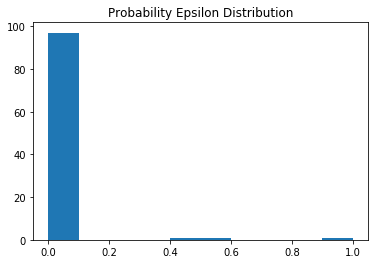

In [44]:
plt.hist(prob_epsilon)
plt.title('Probability Epsilon Distribution')
plt.show()

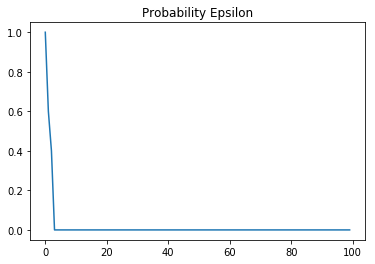

In [45]:
plt.plot(prob_epsilon)
plt.title('Probability Epsilon')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

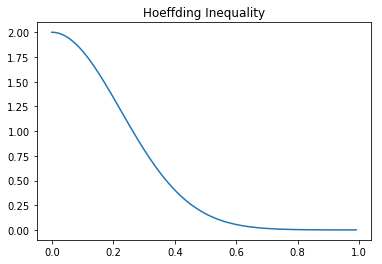

In [49]:
N = 5
plt.figure()
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
plt.title('Hoeffding Inequality')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

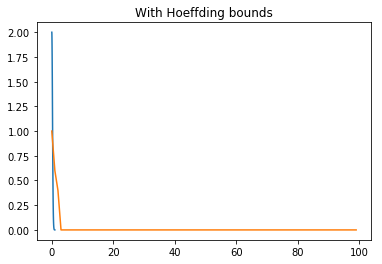

In [50]:
plt.figure()
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons])
plt.plot(prob_epsilon)
plt.title('With Hoeffding bounds')
plt.show

# The probability of difference between Ein and Eout does not obey the Hoeffding bounds. The lines crossed in the graph. In the experiment though the Error Rates Ein and Eout match closely, on the other hands the error rates are high that shows that the selected numerical and categorical attributes are not the correct choice for learning. Also I hope that running experiments for more iterations could give good results as I think that currently running experiemnts 5 times each with just 2 iterations may be not enough as the sample space could be very small that does not give nice Eins to plot the graph with out crossed lines.